In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [3]:
def read_csv(df):
    return pd.read_csv(df,sep=",")

In [4]:
soil = read_csv("Soil Sensitivity Dataset.csv")

In [5]:
soil.head(2)

,Depth,Dry Unit,Fines,Moisture Content,Liquid Limit,Plastic Limit,Plasticity Index,Specific Gravity,USCS,N Value
0,13.0,14.88684,87.511141,24.7,34.5,23.0,11.5,3.0,CL,M
1,20.0,14.88684,87.511141,24.7,34.5,23.0,11.5,3.0,CL,L


### EDA

In [6]:
soil["USCS"].unique()

array(['CL', 'CH', 'GM', 'GC', 'SC', 'ML', 'SM', 'CL-ML', 'MH', 'SM-ML',
       'CL-SC', 'CL-SM', 'SP-SM', 'SP', 'SP-SC', 'CH-CL', 'CL-GC'],
      dtype=object)

In [7]:
soil["N Value"].unique()

array(['M', 'L', 'VL', 'D', 'VD'], dtype=object)

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
encoder = LabelEncoder()

In [10]:
soil["N Value"] = encoder.fit_transform(soil["N Value"])

In [11]:
soil.head(3)

,Depth,Dry Unit,Fines,Moisture Content,Liquid Limit,Plastic Limit,Plasticity Index,Specific Gravity,USCS,N Value
0,13.0,14.88684,87.511141,24.7,34.5,23.0,11.5,3.0,CL,2
1,20.0,14.88684,87.511141,24.7,34.5,23.0,11.5,3.0,CL,1
2,25.0,9.85644,87.511141,59.5,39.0,22.0,17.0,3.0,CL,4


<Figure size 1440x864 with 0 Axes>

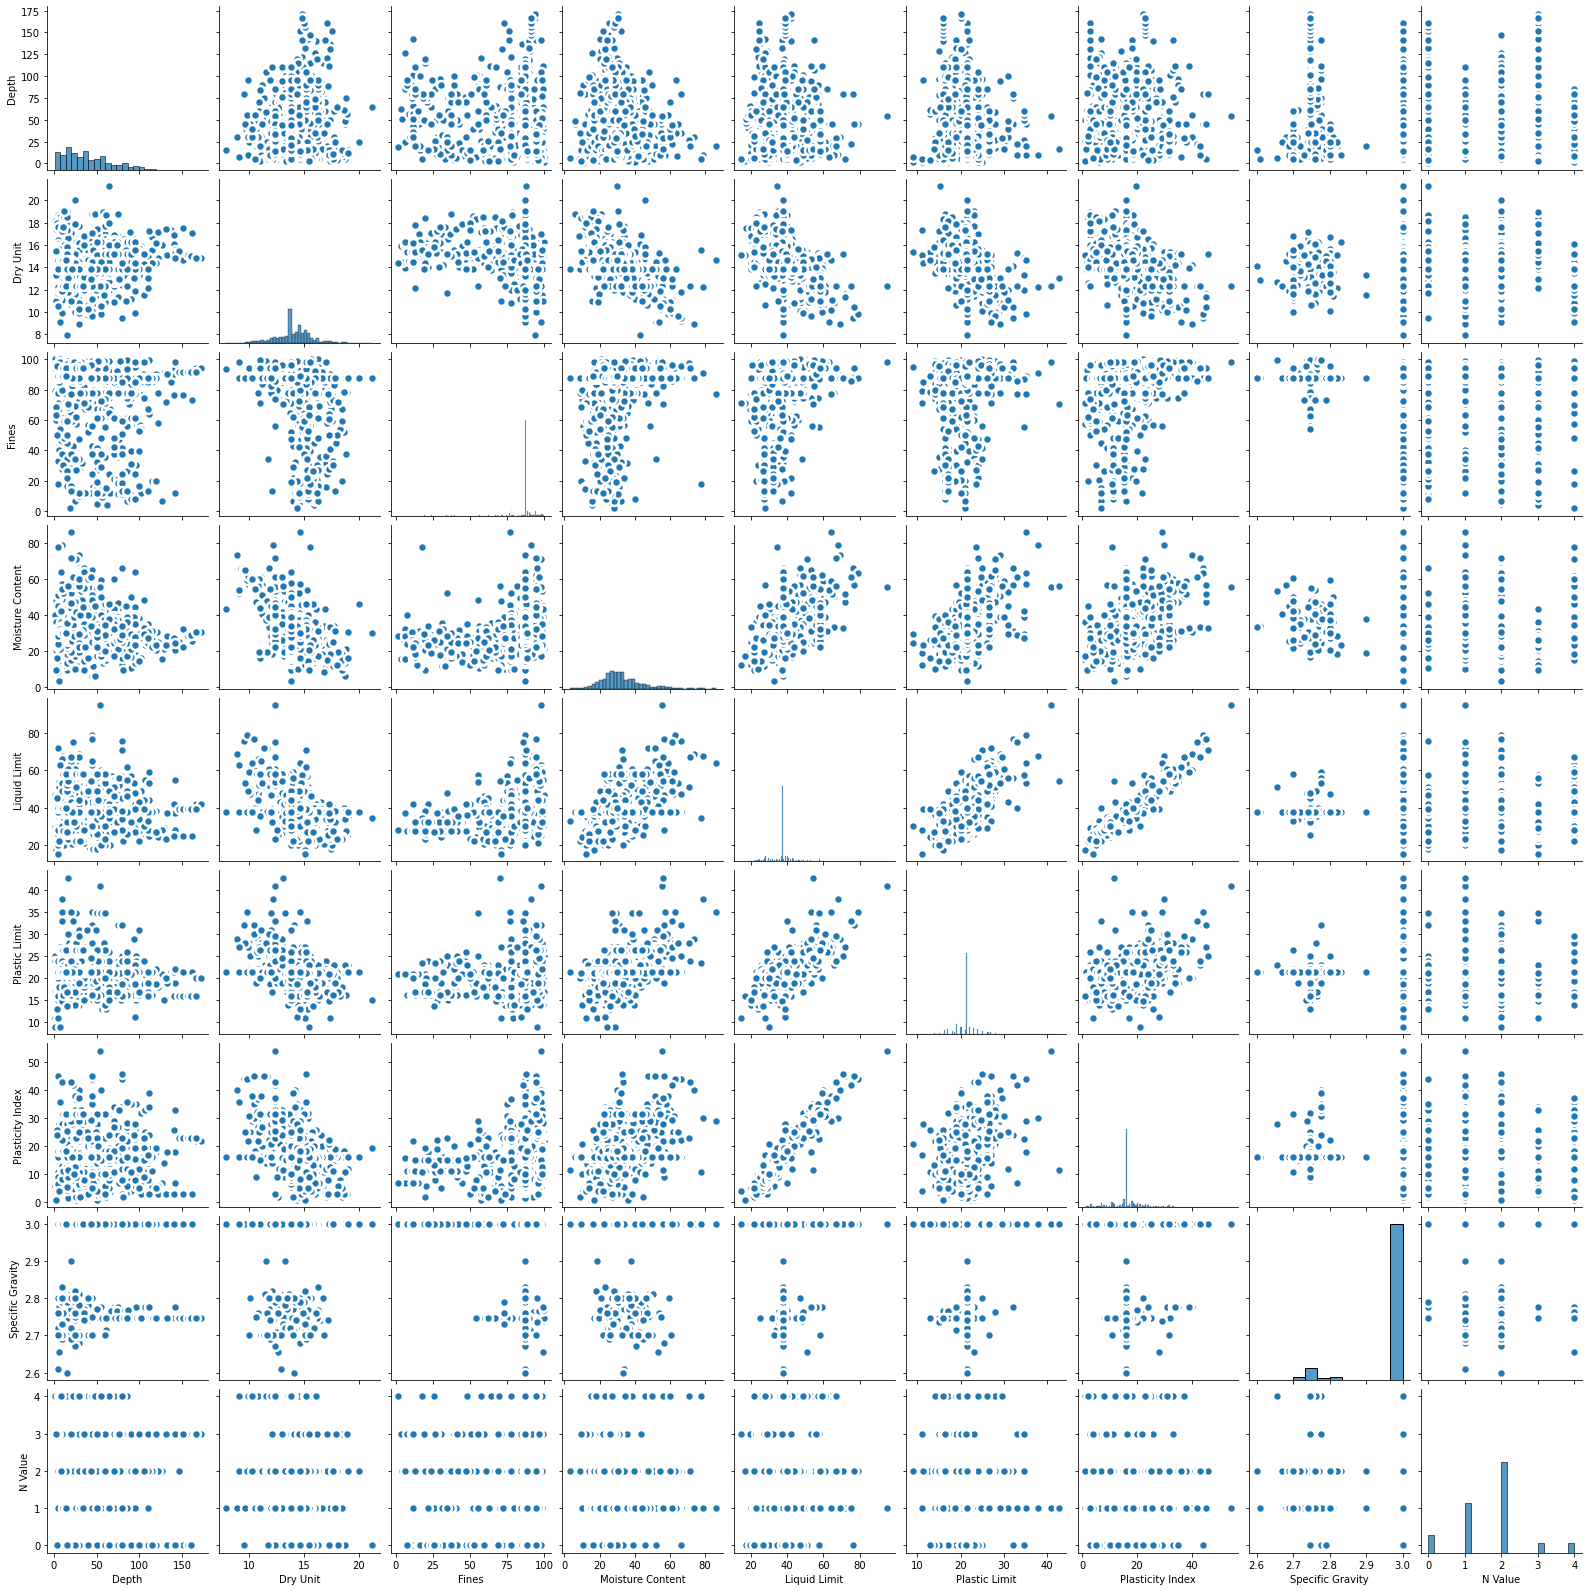

In [12]:
# Type of correlations 
plt.figure(figsize = (20, 12))
num_cols = ['Depth','Dry Unit',	'Fines','Moisture Content',"Liquid Limit","Plastic Limit","Plasticity Index","Specific Gravity","N Value"]
sns.pairplot(soil[num_cols], kind="scatter", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

In [13]:
soil["USCS"].unique()

array(['CL', 'CH', 'GM', 'GC', 'SC', 'ML', 'SM', 'CL-ML', 'MH', 'SM-ML',
       'CL-SC', 'CL-SM', 'SP-SM', 'SP', 'SP-SC', 'CH-CL', 'CL-GC'],
      dtype=object)

In [14]:
def mapping(val):
    if (val == "CL" or val == "ML"):
        return 1
    elif (val == "MH" or val == "CH"):
        return 2
    elif (val == "SM" or val == "SC"):
        return 3
    elif (val == "SW" or val == "SP"):
        return 4
    elif (val == "GM" or val == "GC"):
        return 5
    elif (val == "GW" or val == "GP"):
        return 6
    elif (val == 'CL-ML' or val == "SM-ML"):
        return 1
    elif (val == "CL-SC" or val == "SP-SC"):
        return 3
    elif (val == "CL-SM" or val == "SP-SM"):
        return 3
    elif (val == "CH-CL"):
        return 1
    elif (val == "CL-GC"):
        return 5

In [15]:
soil["USCS"] = soil["USCS"].apply(lambda x: mapping(str(x)))

In [16]:
soil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1699 entries, 0 to 1698
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Depth             1699 non-null   float64
 1   Dry Unit          1699 non-null   float64
 2   Fines             1699 non-null   float64
 3   Moisture Content  1699 non-null   float64
 4   Liquid Limit      1699 non-null   float64
 5   Plastic Limit     1699 non-null   float64
 6   Plasticity Index  1699 non-null   float64
 7   Specific Gravity  1699 non-null   float64
 8   USCS              1699 non-null   int64  
 9   N Value           1699 non-null   int32  
dtypes: float64(8), int32(1), int64(1)
memory usage: 126.2 KB


In [17]:
soil.head(15)

,Depth,Dry Unit,Fines,Moisture Content,Liquid Limit,Plastic Limit,Plasticity Index,Specific Gravity,USCS,N Value
0,13.00,14.88684,87.511141,24.7,34.500000,23.000000,11.500000,3.0,1,2
1,20.00,14.88684,87.511141,24.7,34.500000,23.000000,11.500000,3.0,1,1
2,25.00,9.85644,87.511141,59.5,39.000000,22.000000,17.000000,3.0,1,4
3,45.01,18.72252,87.511141,5.8,37.575938,21.412232,16.163705,3.0,1,2
4,48.50,18.72252,87.511141,5.8,37.575938,21.412232,16.163705,3.0,1,2
5,2.50,15.34272,62.800000,21.7,31.000000,18.000000,13.000000,3.0,1,2
6,8.00,15.34272,59.500000,21.7,31.000000,18.000000,13.000000,3.0,1,2
7,10.00,14.42132,59.500000,21.1,31.000000,18.000000,13.000000,3.0,1,2
8,1.00,14.61960,87.511141,17.8,28.000000,17.000000,11.000000,3.0,1,2
9,3.00,14.61960,87.511141,17.8,28.000000,17.000000,11.000000,3.0,1,0


In [18]:
soil.corr()["N Value"]

Depth              -0.015030
Dry Unit            0.010495
Fines              -0.039654
Moisture Content   -0.008714
Liquid Limit       -0.040914
Plastic Limit      -0.039149
Plasticity Index   -0.033464
Specific Gravity   -0.004976
USCS                0.037997
N Value             1.000000
Name: N Value, dtype: float64

In [19]:
soil.describe()

,Depth,Dry Unit,Fines,Moisture Content,Liquid Limit,Plastic Limit,Plasticity Index,Specific Gravity,USCS,N Value
count,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000
mean,40.419640,14.080202,81.944089,32.028144,37.579863,21.165593,16.414269,2.970253,1.208358,1.686286
std,29.485702,1.616591,17.521769,10.817450,7.723347,2.783219,6.186778,0.081580,0.607298,0.920193
min,1.000000,7.900000,1.700000,3.000000,15.000000,9.000000,1.000000,2.600000,1.000000,0.000000
25%,17.000000,13.300000,85.300000,25.000000,35.245122,20.144262,15.100860,3.000000,1.000000,1.000000
50%,35.000000,14.000000,87.511141,30.400000,37.575938,21.412232,16.163705,3.000000,1.000000,2.000000
75%,56.550000,15.000000,87.511141,37.600000,38.000000,21.412232,18.000000,3.000000,1.000000,2.000000
max,171.500000,21.221103,100.000000,86.000000,95.168877,42.771770,54.192936,3.000000,5.000000,4.000000


In [20]:
soil["Depth"].quantile(0.75)

56.55

In [21]:
def group_cols(val,y):
    if (val <= soil[y].quantile(0.25)):
        return 1
    elif (val > soil[y].quantile(0.25) and val <= soil[y].quantile(0.5)):
        return 2
    elif (val > soil[y].quantile(0.5) and val <= soil[y].quantile(0.75)):
        return 3
    elif (val > soil[y].quantile(0.75)):
        return 4

In [22]:
soil["Depth"] = soil["Depth"].apply(lambda x : group_cols(x,"Depth"))
soil["Plastic Limit"] = soil["Plastic Limit"].apply(lambda x: group_cols(x,"Plastic Limit"))

In [23]:
soil.head(10)

,Depth,Dry Unit,Fines,Moisture Content,Liquid Limit,Plastic Limit,Plasticity Index,Specific Gravity,USCS,N Value
0,1,14.88684,87.511141,24.7,34.500000,4,11.500000,3.0,1,2
1,2,14.88684,87.511141,24.7,34.500000,4,11.500000,3.0,1,1
2,2,9.85644,87.511141,59.5,39.000000,4,17.000000,3.0,1,4
3,3,18.72252,87.511141,5.8,37.575938,2,16.163705,3.0,1,2
4,3,18.72252,87.511141,5.8,37.575938,2,16.163705,3.0,1,2
5,1,15.34272,62.800000,21.7,31.000000,1,13.000000,3.0,1,2
6,1,15.34272,59.500000,21.7,31.000000,1,13.000000,3.0,1,2
7,1,14.42132,59.500000,21.1,31.000000,1,13.000000,3.0,1,2
8,1,14.61960,87.511141,17.8,28.000000,1,11.000000,3.0,1,2
9,1,14.61960,87.511141,17.8,28.000000,1,11.000000,3.0,1,0


In [24]:
soil.corr()["N Value"]

Depth              -0.016313
Dry Unit            0.010495
Fines              -0.039654
Moisture Content   -0.008714
Liquid Limit       -0.040914
Plastic Limit      -0.043593
Plasticity Index   -0.033464
Specific Gravity   -0.004976
USCS                0.037997
N Value             1.000000
Name: N Value, dtype: float64

In [25]:
x = soil.drop(columns=["N Value"])
y = soil["N Value"]

In [26]:
from sklearn.model_selection import train_test_split, StratifiedKFold, RepeatedStratifiedKFold
import catboost as ctb
from catboost import Pool
from sklearn.metrics import roc_auc_score

In [27]:
x_train, x_val, y_train, y_val = train_test_split(x,y,test_size = 0.1,stratify= y,random_state = 42)

In [28]:
(x_train.shape,y_train.shape,x_val.shape,y_val.shape)

((1529, 9), (1529,), (170, 9), (170,))

In [29]:
skf = RepeatedStratifiedKFold(n_splits=5, random_state=None)

### Model

In [30]:
test_score=[]
train_score=[]

In [31]:
for train_index, test_index in skf.split(x_train,y_train):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = x_train.iloc[train_index], x_train.iloc[test_index]
    Y_train, Y_test = y_train.iloc[train_index], y_train.iloc[test_index]
    
    
    model = ctb.CatBoostClassifier(loss_function = "MultiClass",custom_metric="AUC") 
    train_dataset = Pool(X_train, Y_train, feature_names=list(X_train.columns)) 
    eval_dataset = Pool(x_val, y_val)
    
    
    model.fit(train_dataset,eval_set=eval_dataset,early_stopping_rounds= 30)
    train_preds = model.predict_proba(X_train)
    print("Train log_loss score: ",roc_auc_score(Y_train,train_preds, multi_class='ovo',average = 'weighted'))
    train_score.append(np.mean(roc_auc_score(Y_train,train_preds, multi_class='ovo',average = 'weighted')))
    
    test_preds = model.predict_proba(X_test)
    print("Test log_loss score: ", roc_auc_score(Y_test,test_preds, multi_class='ovo',average = 'weighted'))
    test_score.append(np.mean(roc_auc_score(Y_test,test_preds, multi_class='ovo',average = 'weighted')))
    
    #submission = model.predict_proba(new_test)
    #sub_list.append(submission)

Learning rate set to 0.108412
0:	learn: 1.5073159	test: 1.5003159	best: 1.5003159 (0)	total: 270ms	remaining: 4m 29s
1:	learn: 1.4339467	test: 1.4323596	best: 1.4323596 (1)	total: 294ms	remaining: 2m 26s
2:	learn: 1.3728730	test: 1.3664952	best: 1.3664952 (2)	total: 307ms	remaining: 1m 42s
3:	learn: 1.3213526	test: 1.3099025	best: 1.3099025 (3)	total: 317ms	remaining: 1m 18s
4:	learn: 1.2759025	test: 1.2661401	best: 1.2661401 (4)	total: 327ms	remaining: 1m 5s
5:	learn: 1.2379809	test: 1.2271874	best: 1.2271874 (5)	total: 335ms	remaining: 55.6s
6:	learn: 1.2090603	test: 1.1982673	best: 1.1982673 (6)	total: 345ms	remaining: 48.9s
7:	learn: 1.1830086	test: 1.1766543	best: 1.1766543 (7)	total: 351ms	remaining: 43.6s
8:	learn: 1.1584076	test: 1.1536917	best: 1.1536917 (8)	total: 360ms	remaining: 39.6s
9:	learn: 1.1381509	test: 1.1375665	best: 1.1375665 (9)	total: 367ms	remaining: 36.3s
10:	learn: 1.1189665	test: 1.1183596	best: 1.1183596 (10)	total: 374ms	remaining: 33.6s
11:	learn: 1.10230

113:	learn: 0.7685599	test: 0.9507017	best: 0.9505113 (111)	total: 1.22s	remaining: 9.49s
114:	learn: 0.7669818	test: 0.9498220	best: 0.9498220 (114)	total: 1.23s	remaining: 9.47s
115:	learn: 0.7659016	test: 0.9497759	best: 0.9497759 (115)	total: 1.24s	remaining: 9.45s
116:	learn: 0.7646924	test: 0.9498470	best: 0.9497759 (115)	total: 1.25s	remaining: 9.43s
117:	learn: 0.7640644	test: 0.9492035	best: 0.9492035 (117)	total: 1.26s	remaining: 9.41s
118:	learn: 0.7626538	test: 0.9493230	best: 0.9492035 (117)	total: 1.27s	remaining: 9.4s
119:	learn: 0.7606975	test: 0.9503342	best: 0.9492035 (117)	total: 1.28s	remaining: 9.38s
120:	learn: 0.7582097	test: 0.9493320	best: 0.9492035 (117)	total: 1.29s	remaining: 9.35s
121:	learn: 0.7569392	test: 0.9491789	best: 0.9491789 (121)	total: 1.29s	remaining: 9.31s
122:	learn: 0.7560055	test: 0.9500697	best: 0.9491789 (121)	total: 1.3s	remaining: 9.28s
123:	learn: 0.7546663	test: 0.9493811	best: 0.9491789 (121)	total: 1.31s	remaining: 9.25s
124:	learn: 

36:	learn: 0.9438819	test: 0.9717785	best: 0.9717785 (36)	total: 308ms	remaining: 8.02s
37:	learn: 0.9404120	test: 0.9704697	best: 0.9704697 (37)	total: 318ms	remaining: 8.04s
38:	learn: 0.9347827	test: 0.9681370	best: 0.9681370 (38)	total: 328ms	remaining: 8.08s
39:	learn: 0.9318973	test: 0.9667711	best: 0.9667711 (39)	total: 336ms	remaining: 8.06s
40:	learn: 0.9298930	test: 0.9658955	best: 0.9658955 (40)	total: 344ms	remaining: 8.05s
41:	learn: 0.9246696	test: 0.9643370	best: 0.9643370 (41)	total: 352ms	remaining: 8.03s
42:	learn: 0.9216388	test: 0.9616510	best: 0.9616510 (42)	total: 360ms	remaining: 8.01s
43:	learn: 0.9202040	test: 0.9598653	best: 0.9598653 (43)	total: 367ms	remaining: 7.97s
44:	learn: 0.9162711	test: 0.9564489	best: 0.9564489 (44)	total: 375ms	remaining: 7.96s
45:	learn: 0.9141057	test: 0.9555130	best: 0.9555130 (45)	total: 382ms	remaining: 7.92s
46:	learn: 0.9120352	test: 0.9543193	best: 0.9543193 (46)	total: 390ms	remaining: 7.9s
47:	learn: 0.9112005	test: 0.9530

142:	learn: 0.7355152	test: 0.9179474	best: 0.9139693 (113)	total: 1.28s	remaining: 7.7s
143:	learn: 0.7345987	test: 0.9184042	best: 0.9139693 (113)	total: 1.29s	remaining: 7.69s
Stopped by overfitting detector  (30 iterations wait)

bestTest = 0.9139693195
bestIteration = 113

Shrink model to first 114 iterations.
Train log_loss score:  0.8937679777115275
Test log_loss score:  0.7984755690768077
Learning rate set to 0.108412
0:	learn: 1.5102831	test: 1.5026828	best: 1.5026828 (0)	total: 35ms	remaining: 35s
1:	learn: 1.4367476	test: 1.4295138	best: 1.4295138 (1)	total: 47.2ms	remaining: 23.6s
2:	learn: 1.3764171	test: 1.3714739	best: 1.3714739 (2)	total: 59.4ms	remaining: 19.7s
3:	learn: 1.3283414	test: 1.3255732	best: 1.3255732 (3)	total: 70ms	remaining: 17.4s
4:	learn: 1.2846853	test: 1.2864981	best: 1.2864981 (4)	total: 77.3ms	remaining: 15.4s
5:	learn: 1.2472983	test: 1.2494758	best: 1.2494758 (5)	total: 84.8ms	remaining: 14.1s
6:	learn: 1.2170570	test: 1.2179870	best: 1.2179870 (6

101:	learn: 0.7946633	test: 0.9372942	best: 0.9372942 (101)	total: 850ms	remaining: 7.48s
102:	learn: 0.7921372	test: 0.9370342	best: 0.9370342 (102)	total: 859ms	remaining: 7.48s
103:	learn: 0.7909469	test: 0.9368879	best: 0.9368879 (103)	total: 868ms	remaining: 7.48s
104:	learn: 0.7903216	test: 0.9375659	best: 0.9368879 (103)	total: 875ms	remaining: 7.46s
105:	learn: 0.7889940	test: 0.9369440	best: 0.9368879 (103)	total: 883ms	remaining: 7.45s
106:	learn: 0.7871806	test: 0.9374828	best: 0.9368879 (103)	total: 891ms	remaining: 7.43s
107:	learn: 0.7862196	test: 0.9368043	best: 0.9368043 (107)	total: 899ms	remaining: 7.42s
108:	learn: 0.7840307	test: 0.9355944	best: 0.9355944 (108)	total: 906ms	remaining: 7.41s
109:	learn: 0.7830736	test: 0.9357307	best: 0.9355944 (108)	total: 914ms	remaining: 7.39s
110:	learn: 0.7809549	test: 0.9366955	best: 0.9355944 (108)	total: 921ms	remaining: 7.38s
111:	learn: 0.7799353	test: 0.9365614	best: 0.9355944 (108)	total: 929ms	remaining: 7.36s
112:	learn

62:	learn: 0.8598403	test: 0.9477815	best: 0.9473759 (60)	total: 503ms	remaining: 7.48s
63:	learn: 0.8575306	test: 0.9467122	best: 0.9467122 (63)	total: 511ms	remaining: 7.48s
64:	learn: 0.8557792	test: 0.9462080	best: 0.9462080 (64)	total: 520ms	remaining: 7.48s
65:	learn: 0.8545849	test: 0.9458858	best: 0.9458858 (65)	total: 530ms	remaining: 7.5s
66:	learn: 0.8518150	test: 0.9459410	best: 0.9458858 (65)	total: 540ms	remaining: 7.51s
67:	learn: 0.8501845	test: 0.9446056	best: 0.9446056 (67)	total: 548ms	remaining: 7.51s
68:	learn: 0.8481716	test: 0.9438308	best: 0.9438308 (68)	total: 556ms	remaining: 7.5s
69:	learn: 0.8464920	test: 0.9424233	best: 0.9424233 (69)	total: 564ms	remaining: 7.5s
70:	learn: 0.8441850	test: 0.9422496	best: 0.9422496 (70)	total: 572ms	remaining: 7.49s
71:	learn: 0.8432957	test: 0.9406249	best: 0.9406249 (71)	total: 582ms	remaining: 7.5s
72:	learn: 0.8422344	test: 0.9415351	best: 0.9406249 (71)	total: 590ms	remaining: 7.49s
73:	learn: 0.8399271	test: 0.9409501

156:	learn: 0.7030219	test: 0.9204337	best: 0.9177588 (149)	total: 1.27s	remaining: 6.8s
157:	learn: 0.7014403	test: 0.9199331	best: 0.9177588 (149)	total: 1.28s	remaining: 6.81s
158:	learn: 0.6999203	test: 0.9197453	best: 0.9177588 (149)	total: 1.29s	remaining: 6.82s
159:	learn: 0.6989444	test: 0.9203382	best: 0.9177588 (149)	total: 1.3s	remaining: 6.82s
160:	learn: 0.6972490	test: 0.9204744	best: 0.9177588 (149)	total: 1.31s	remaining: 6.81s
161:	learn: 0.6961680	test: 0.9207203	best: 0.9177588 (149)	total: 1.32s	remaining: 6.81s
162:	learn: 0.6951137	test: 0.9199804	best: 0.9177588 (149)	total: 1.32s	remaining: 6.8s
163:	learn: 0.6937095	test: 0.9200629	best: 0.9177588 (149)	total: 1.33s	remaining: 6.79s
164:	learn: 0.6922588	test: 0.9193292	best: 0.9177588 (149)	total: 1.34s	remaining: 6.79s
165:	learn: 0.6911463	test: 0.9196410	best: 0.9177588 (149)	total: 1.35s	remaining: 6.77s
166:	learn: 0.6894200	test: 0.9203968	best: 0.9177588 (149)	total: 1.36s	remaining: 6.77s
167:	learn: 0

77:	learn: 0.8268928	test: 0.9214087	best: 0.9214087 (77)	total: 696ms	remaining: 8.23s
78:	learn: 0.8250402	test: 0.9216617	best: 0.9214087 (77)	total: 707ms	remaining: 8.24s
79:	learn: 0.8225139	test: 0.9215605	best: 0.9214087 (77)	total: 719ms	remaining: 8.26s
80:	learn: 0.8206611	test: 0.9212575	best: 0.9212575 (80)	total: 727ms	remaining: 8.25s
81:	learn: 0.8187510	test: 0.9208849	best: 0.9208849 (81)	total: 736ms	remaining: 8.24s
82:	learn: 0.8171937	test: 0.9212714	best: 0.9208849 (81)	total: 746ms	remaining: 8.24s
83:	learn: 0.8156182	test: 0.9214670	best: 0.9208849 (81)	total: 755ms	remaining: 8.23s
84:	learn: 0.8142533	test: 0.9199942	best: 0.9199942 (84)	total: 763ms	remaining: 8.21s
85:	learn: 0.8112982	test: 0.9187203	best: 0.9187203 (85)	total: 771ms	remaining: 8.19s
86:	learn: 0.8092588	test: 0.9187365	best: 0.9187203 (85)	total: 778ms	remaining: 8.17s
87:	learn: 0.8080583	test: 0.9182375	best: 0.9182375 (87)	total: 786ms	remaining: 8.14s
88:	learn: 0.8055453	test: 0.917

56:	learn: 0.8757775	test: 0.9565787	best: 0.9565787 (56)	total: 469ms	remaining: 7.76s
57:	learn: 0.8734608	test: 0.9563048	best: 0.9563048 (57)	total: 478ms	remaining: 7.76s
58:	learn: 0.8714052	test: 0.9563918	best: 0.9563048 (57)	total: 487ms	remaining: 7.76s
59:	learn: 0.8696999	test: 0.9568997	best: 0.9563048 (57)	total: 495ms	remaining: 7.75s
60:	learn: 0.8669307	test: 0.9573709	best: 0.9563048 (57)	total: 502ms	remaining: 7.72s
61:	learn: 0.8654294	test: 0.9566876	best: 0.9563048 (57)	total: 509ms	remaining: 7.7s
62:	learn: 0.8625797	test: 0.9564967	best: 0.9563048 (57)	total: 516ms	remaining: 7.68s
63:	learn: 0.8608469	test: 0.9561604	best: 0.9561604 (63)	total: 523ms	remaining: 7.65s
64:	learn: 0.8583020	test: 0.9557297	best: 0.9557297 (64)	total: 531ms	remaining: 7.63s
65:	learn: 0.8563974	test: 0.9557929	best: 0.9557297 (64)	total: 538ms	remaining: 7.62s
66:	learn: 0.8544066	test: 0.9543663	best: 0.9543663 (66)	total: 547ms	remaining: 7.61s
67:	learn: 0.8531866	test: 0.9534

10:	learn: 1.1241452	test: 1.1226033	best: 1.1226033 (10)	total: 94ms	remaining: 8.45s
11:	learn: 1.1067609	test: 1.1040369	best: 1.1040369 (11)	total: 103ms	remaining: 8.5s
12:	learn: 1.0941846	test: 1.0921736	best: 1.0921736 (12)	total: 113ms	remaining: 8.55s
13:	learn: 1.0798397	test: 1.0785868	best: 1.0785868 (13)	total: 124ms	remaining: 8.71s
14:	learn: 1.0661654	test: 1.0676297	best: 1.0676297 (14)	total: 132ms	remaining: 8.67s
15:	learn: 1.0543628	test: 1.0584318	best: 1.0584318 (15)	total: 140ms	remaining: 8.58s
16:	learn: 1.0441762	test: 1.0515802	best: 1.0515802 (16)	total: 148ms	remaining: 8.53s
17:	learn: 1.0325466	test: 1.0415620	best: 1.0415620 (17)	total: 155ms	remaining: 8.47s
18:	learn: 1.0230631	test: 1.0341071	best: 1.0341071 (18)	total: 164ms	remaining: 8.45s
19:	learn: 1.0157344	test: 1.0293136	best: 1.0293136 (19)	total: 171ms	remaining: 8.4s
20:	learn: 1.0076017	test: 1.0234391	best: 1.0234391 (20)	total: 178ms	remaining: 8.31s
21:	learn: 0.9999274	test: 1.016602

104:	learn: 0.7846014	test: 0.9414450	best: 0.9414450 (104)	total: 850ms	remaining: 7.24s
105:	learn: 0.7829977	test: 0.9414853	best: 0.9414450 (104)	total: 858ms	remaining: 7.24s
106:	learn: 0.7823642	test: 0.9409546	best: 0.9409546 (106)	total: 868ms	remaining: 7.25s
107:	learn: 0.7799658	test: 0.9387215	best: 0.9387215 (107)	total: 878ms	remaining: 7.25s
108:	learn: 0.7793366	test: 0.9384560	best: 0.9384560 (108)	total: 888ms	remaining: 7.26s
109:	learn: 0.7780079	test: 0.9386450	best: 0.9384560 (108)	total: 897ms	remaining: 7.26s
110:	learn: 0.7764065	test: 0.9384216	best: 0.9384216 (110)	total: 905ms	remaining: 7.25s
111:	learn: 0.7747938	test: 0.9394869	best: 0.9384216 (110)	total: 913ms	remaining: 7.24s
112:	learn: 0.7736050	test: 0.9398214	best: 0.9384216 (110)	total: 921ms	remaining: 7.23s
113:	learn: 0.7725769	test: 0.9398623	best: 0.9384216 (110)	total: 928ms	remaining: 7.21s
114:	learn: 0.7709376	test: 0.9390066	best: 0.9384216 (110)	total: 936ms	remaining: 7.2s
115:	learn:

56:	learn: 0.8784337	test: 0.9276555	best: 0.9276555 (56)	total: 481ms	remaining: 7.96s
57:	learn: 0.8770842	test: 0.9263320	best: 0.9263320 (57)	total: 490ms	remaining: 7.96s
58:	learn: 0.8754684	test: 0.9252493	best: 0.9252493 (58)	total: 501ms	remaining: 8s
59:	learn: 0.8733588	test: 0.9256401	best: 0.9252493 (58)	total: 511ms	remaining: 8.01s
60:	learn: 0.8720037	test: 0.9260342	best: 0.9252493 (58)	total: 520ms	remaining: 8s
61:	learn: 0.8695642	test: 0.9257540	best: 0.9252493 (58)	total: 530ms	remaining: 8.02s
62:	learn: 0.8682930	test: 0.9248731	best: 0.9248731 (62)	total: 539ms	remaining: 8.02s
63:	learn: 0.8660793	test: 0.9242727	best: 0.9242727 (63)	total: 546ms	remaining: 7.99s
64:	learn: 0.8654092	test: 0.9241085	best: 0.9241085 (64)	total: 553ms	remaining: 7.96s
65:	learn: 0.8628294	test: 0.9223643	best: 0.9223643 (65)	total: 561ms	remaining: 7.93s
66:	learn: 0.8606470	test: 0.9212765	best: 0.9212765 (66)	total: 568ms	remaining: 7.91s
67:	learn: 0.8579741	test: 0.9220368	b

13:	learn: 1.0732064	test: 1.0760269	best: 1.0760269 (13)	total: 111ms	remaining: 7.78s
14:	learn: 1.0596884	test: 1.0656729	best: 1.0656729 (14)	total: 120ms	remaining: 7.89s
15:	learn: 1.0479032	test: 1.0574649	best: 1.0574649 (15)	total: 130ms	remaining: 7.97s
16:	learn: 1.0394692	test: 1.0502681	best: 1.0502681 (16)	total: 138ms	remaining: 7.99s
17:	learn: 1.0297803	test: 1.0414818	best: 1.0414818 (17)	total: 146ms	remaining: 7.94s
18:	learn: 1.0209313	test: 1.0368938	best: 1.0368938 (18)	total: 153ms	remaining: 7.9s
19:	learn: 1.0137929	test: 1.0333913	best: 1.0333913 (19)	total: 161ms	remaining: 7.88s
20:	learn: 1.0060697	test: 1.0294470	best: 1.0294470 (20)	total: 169ms	remaining: 7.87s
21:	learn: 0.9995433	test: 1.0245992	best: 1.0245992 (21)	total: 176ms	remaining: 7.84s
22:	learn: 0.9902533	test: 1.0185077	best: 1.0185077 (22)	total: 184ms	remaining: 7.81s
23:	learn: 0.9837032	test: 1.0118255	best: 1.0118255 (23)	total: 191ms	remaining: 7.77s
24:	learn: 0.9782658	test: 1.0095

107:	learn: 0.7794007	test: 0.9477585	best: 0.9467665 (106)	total: 875ms	remaining: 7.23s
108:	learn: 0.7781745	test: 0.9476972	best: 0.9467665 (106)	total: 884ms	remaining: 7.23s
109:	learn: 0.7761921	test: 0.9475362	best: 0.9467665 (106)	total: 893ms	remaining: 7.23s
110:	learn: 0.7749765	test: 0.9479894	best: 0.9467665 (106)	total: 901ms	remaining: 7.21s
111:	learn: 0.7735860	test: 0.9487612	best: 0.9467665 (106)	total: 909ms	remaining: 7.2s
112:	learn: 0.7722910	test: 0.9490785	best: 0.9467665 (106)	total: 915ms	remaining: 7.18s
113:	learn: 0.7709209	test: 0.9494355	best: 0.9467665 (106)	total: 923ms	remaining: 7.17s
114:	learn: 0.7700153	test: 0.9482393	best: 0.9467665 (106)	total: 930ms	remaining: 7.16s
115:	learn: 0.7690184	test: 0.9482256	best: 0.9467665 (106)	total: 938ms	remaining: 7.15s
116:	learn: 0.7671592	test: 0.9476050	best: 0.9467665 (106)	total: 945ms	remaining: 7.13s
117:	learn: 0.7658532	test: 0.9477479	best: 0.9467665 (106)	total: 953ms	remaining: 7.12s
118:	learn:

38:	learn: 0.9203928	test: 0.9721696	best: 0.9721696 (38)	total: 306ms	remaining: 7.54s
39:	learn: 0.9167516	test: 0.9699231	best: 0.9699231 (39)	total: 315ms	remaining: 7.57s
40:	learn: 0.9139647	test: 0.9684153	best: 0.9684153 (40)	total: 325ms	remaining: 7.59s
41:	learn: 0.9101013	test: 0.9660163	best: 0.9660163 (41)	total: 333ms	remaining: 7.6s
42:	learn: 0.9065879	test: 0.9655552	best: 0.9655552 (42)	total: 340ms	remaining: 7.57s
43:	learn: 0.9048872	test: 0.9644307	best: 0.9644307 (43)	total: 348ms	remaining: 7.56s
44:	learn: 0.9018813	test: 0.9628010	best: 0.9628010 (44)	total: 355ms	remaining: 7.53s
45:	learn: 0.8990605	test: 0.9614193	best: 0.9614193 (45)	total: 362ms	remaining: 7.51s
46:	learn: 0.8958293	test: 0.9603226	best: 0.9603226 (46)	total: 370ms	remaining: 7.49s
47:	learn: 0.8937389	test: 0.9607443	best: 0.9603226 (46)	total: 377ms	remaining: 7.48s
48:	learn: 0.8927369	test: 0.9593285	best: 0.9593285 (48)	total: 384ms	remaining: 7.45s
49:	learn: 0.8899095	test: 0.9598

134:	learn: 0.7335540	test: 0.9416987	best: 0.9416987 (134)	total: 1.06s	remaining: 6.83s
135:	learn: 0.7321003	test: 0.9415455	best: 0.9415455 (135)	total: 1.08s	remaining: 6.84s
136:	learn: 0.7300092	test: 0.9405665	best: 0.9405665 (136)	total: 1.08s	remaining: 6.84s
137:	learn: 0.7289033	test: 0.9408434	best: 0.9405665 (136)	total: 1.09s	remaining: 6.84s
138:	learn: 0.7279084	test: 0.9407239	best: 0.9405665 (136)	total: 1.1s	remaining: 6.83s
139:	learn: 0.7272960	test: 0.9401867	best: 0.9401867 (139)	total: 1.11s	remaining: 6.83s
140:	learn: 0.7261782	test: 0.9404846	best: 0.9401867 (139)	total: 1.12s	remaining: 6.81s
141:	learn: 0.7249878	test: 0.9417056	best: 0.9401867 (139)	total: 1.13s	remaining: 6.8s
142:	learn: 0.7236540	test: 0.9414607	best: 0.9401867 (139)	total: 1.13s	remaining: 6.79s
143:	learn: 0.7224872	test: 0.9401379	best: 0.9401379 (143)	total: 1.14s	remaining: 6.78s
144:	learn: 0.7204455	test: 0.9404599	best: 0.9401379 (143)	total: 1.15s	remaining: 6.77s
145:	learn: 

57:	learn: 0.8746817	test: 0.9445094	best: 0.9438217 (56)	total: 478ms	remaining: 7.76s
58:	learn: 0.8724661	test: 0.9431526	best: 0.9431526 (58)	total: 487ms	remaining: 7.77s
59:	learn: 0.8708697	test: 0.9427164	best: 0.9427164 (59)	total: 497ms	remaining: 7.79s
60:	learn: 0.8680287	test: 0.9431109	best: 0.9427164 (59)	total: 504ms	remaining: 7.76s
61:	learn: 0.8649670	test: 0.9428558	best: 0.9427164 (59)	total: 512ms	remaining: 7.75s
62:	learn: 0.8620598	test: 0.9428416	best: 0.9427164 (59)	total: 520ms	remaining: 7.73s
63:	learn: 0.8602242	test: 0.9421397	best: 0.9421397 (63)	total: 527ms	remaining: 7.71s
64:	learn: 0.8585026	test: 0.9435636	best: 0.9421397 (63)	total: 534ms	remaining: 7.68s
65:	learn: 0.8555897	test: 0.9418686	best: 0.9418686 (65)	total: 541ms	remaining: 7.66s
66:	learn: 0.8525281	test: 0.9402586	best: 0.9402586 (66)	total: 549ms	remaining: 7.64s
67:	learn: 0.8509825	test: 0.9400671	best: 0.9400671 (67)	total: 559ms	remaining: 7.66s
68:	learn: 0.8494464	test: 0.939

12:	learn: 1.0869426	test: 1.1034397	best: 1.1034397 (12)	total: 98ms	remaining: 7.44s
13:	learn: 1.0725621	test: 1.0892848	best: 1.0892848 (13)	total: 108ms	remaining: 7.63s
14:	learn: 1.0574588	test: 1.0787998	best: 1.0787998 (14)	total: 117ms	remaining: 7.69s
15:	learn: 1.0469761	test: 1.0701882	best: 1.0701882 (15)	total: 127ms	remaining: 7.79s
16:	learn: 1.0361671	test: 1.0622764	best: 1.0622764 (16)	total: 134ms	remaining: 7.74s
17:	learn: 1.0244767	test: 1.0517212	best: 1.0517212 (17)	total: 142ms	remaining: 7.74s
18:	learn: 1.0155956	test: 1.0446846	best: 1.0446846 (18)	total: 149ms	remaining: 7.7s
19:	learn: 1.0081102	test: 1.0386623	best: 1.0386623 (19)	total: 157ms	remaining: 7.69s
20:	learn: 1.0000255	test: 1.0327194	best: 1.0327194 (20)	total: 164ms	remaining: 7.67s
21:	learn: 0.9925942	test: 1.0268519	best: 1.0268519 (21)	total: 172ms	remaining: 7.66s
22:	learn: 0.9853849	test: 1.0244273	best: 1.0244273 (22)	total: 180ms	remaining: 7.63s
23:	learn: 0.9783045	test: 1.01728

112:	learn: 0.7555213	test: 0.9323471	best: 0.9320645 (110)	total: 876ms	remaining: 6.88s
113:	learn: 0.7542645	test: 0.9328096	best: 0.9320645 (110)	total: 885ms	remaining: 6.88s
114:	learn: 0.7534815	test: 0.9326654	best: 0.9320645 (110)	total: 894ms	remaining: 6.88s
115:	learn: 0.7519242	test: 0.9321158	best: 0.9320645 (110)	total: 901ms	remaining: 6.87s
116:	learn: 0.7506988	test: 0.9313363	best: 0.9313363 (116)	total: 909ms	remaining: 6.86s
117:	learn: 0.7487774	test: 0.9302682	best: 0.9302682 (117)	total: 916ms	remaining: 6.85s
118:	learn: 0.7475484	test: 0.9294968	best: 0.9294968 (118)	total: 924ms	remaining: 6.84s
119:	learn: 0.7463405	test: 0.9288986	best: 0.9288986 (119)	total: 931ms	remaining: 6.83s
120:	learn: 0.7449730	test: 0.9279322	best: 0.9279322 (120)	total: 938ms	remaining: 6.82s
121:	learn: 0.7440247	test: 0.9275470	best: 0.9275470 (121)	total: 946ms	remaining: 6.81s
122:	learn: 0.7431292	test: 0.9267448	best: 0.9267448 (122)	total: 953ms	remaining: 6.79s
123:	learn

35:	learn: 0.9414665	test: 0.9840534	best: 0.9840534 (35)	total: 303ms	remaining: 8.12s
36:	learn: 0.9394959	test: 0.9824195	best: 0.9824195 (36)	total: 312ms	remaining: 8.11s
37:	learn: 0.9354833	test: 0.9806003	best: 0.9806003 (37)	total: 320ms	remaining: 8.11s
38:	learn: 0.9332788	test: 0.9810848	best: 0.9806003 (37)	total: 327ms	remaining: 8.07s
39:	learn: 0.9317998	test: 0.9800975	best: 0.9800975 (39)	total: 335ms	remaining: 8.04s
40:	learn: 0.9297673	test: 0.9779704	best: 0.9779704 (40)	total: 343ms	remaining: 8.02s
41:	learn: 0.9280187	test: 0.9776154	best: 0.9776154 (41)	total: 350ms	remaining: 7.99s
42:	learn: 0.9248816	test: 0.9759875	best: 0.9759875 (42)	total: 358ms	remaining: 7.96s
43:	learn: 0.9226042	test: 0.9753411	best: 0.9753411 (43)	total: 365ms	remaining: 7.93s
44:	learn: 0.9195888	test: 0.9747879	best: 0.9747879 (44)	total: 373ms	remaining: 7.92s
45:	learn: 0.9169811	test: 0.9730686	best: 0.9730686 (45)	total: 381ms	remaining: 7.91s
46:	learn: 0.9129746	test: 0.973

32:	learn: 0.9510283	test: 0.9742706	best: 0.9742706 (32)	total: 294ms	remaining: 8.63s
33:	learn: 0.9470179	test: 0.9717789	best: 0.9717789 (33)	total: 304ms	remaining: 8.63s
34:	learn: 0.9435653	test: 0.9715788	best: 0.9715788 (34)	total: 314ms	remaining: 8.67s
35:	learn: 0.9410262	test: 0.9709716	best: 0.9709716 (35)	total: 323ms	remaining: 8.65s
36:	learn: 0.9392777	test: 0.9699640	best: 0.9699640 (36)	total: 331ms	remaining: 8.62s
37:	learn: 0.9358429	test: 0.9690886	best: 0.9690886 (37)	total: 340ms	remaining: 8.6s
38:	learn: 0.9332509	test: 0.9670352	best: 0.9670352 (38)	total: 347ms	remaining: 8.56s
39:	learn: 0.9304885	test: 0.9658441	best: 0.9658441 (39)	total: 356ms	remaining: 8.53s
40:	learn: 0.9286761	test: 0.9632889	best: 0.9632889 (40)	total: 363ms	remaining: 8.49s
41:	learn: 0.9258359	test: 0.9624287	best: 0.9624287 (41)	total: 370ms	remaining: 8.45s
42:	learn: 0.9227123	test: 0.9612171	best: 0.9612171 (42)	total: 378ms	remaining: 8.42s
43:	learn: 0.9196380	test: 0.9586

127:	learn: 0.7611214	test: 0.9276034	best: 0.9258765 (121)	total: 1.07s	remaining: 7.31s
128:	learn: 0.7596350	test: 0.9274083	best: 0.9258765 (121)	total: 1.08s	remaining: 7.31s
129:	learn: 0.7582089	test: 0.9275522	best: 0.9258765 (121)	total: 1.09s	remaining: 7.31s
130:	learn: 0.7571321	test: 0.9277085	best: 0.9258765 (121)	total: 1.1s	remaining: 7.3s
131:	learn: 0.7552666	test: 0.9279300	best: 0.9258765 (121)	total: 1.11s	remaining: 7.29s
132:	learn: 0.7537425	test: 0.9288077	best: 0.9258765 (121)	total: 1.12s	remaining: 7.28s
133:	learn: 0.7521710	test: 0.9283058	best: 0.9258765 (121)	total: 1.12s	remaining: 7.26s
134:	learn: 0.7509076	test: 0.9279875	best: 0.9258765 (121)	total: 1.13s	remaining: 7.25s
135:	learn: 0.7502628	test: 0.9275752	best: 0.9258765 (121)	total: 1.14s	remaining: 7.24s
136:	learn: 0.7489607	test: 0.9286397	best: 0.9258765 (121)	total: 1.15s	remaining: 7.22s
137:	learn: 0.7483864	test: 0.9287628	best: 0.9258765 (121)	total: 1.15s	remaining: 7.21s
138:	learn: 

85:	learn: 0.8241087	test: 0.9291101	best: 0.9291101 (85)	total: 676ms	remaining: 7.19s
86:	learn: 0.8222508	test: 0.9293745	best: 0.9291101 (85)	total: 685ms	remaining: 7.19s
87:	learn: 0.8212960	test: 0.9292519	best: 0.9291101 (85)	total: 695ms	remaining: 7.2s
88:	learn: 0.8180968	test: 0.9296302	best: 0.9291101 (85)	total: 702ms	remaining: 7.18s
89:	learn: 0.8159659	test: 0.9293842	best: 0.9291101 (85)	total: 709ms	remaining: 7.17s
90:	learn: 0.8144886	test: 0.9289258	best: 0.9289258 (90)	total: 716ms	remaining: 7.16s
91:	learn: 0.8124312	test: 0.9280536	best: 0.9280536 (91)	total: 723ms	remaining: 7.14s
92:	learn: 0.8112674	test: 0.9280009	best: 0.9280009 (92)	total: 731ms	remaining: 7.13s
93:	learn: 0.8092559	test: 0.9279365	best: 0.9279365 (93)	total: 739ms	remaining: 7.12s
94:	learn: 0.8069577	test: 0.9268658	best: 0.9268658 (94)	total: 750ms	remaining: 7.14s
95:	learn: 0.8055603	test: 0.9263373	best: 0.9263373 (95)	total: 761ms	remaining: 7.17s
96:	learn: 0.8025670	test: 0.9236

36:	learn: 0.9349760	test: 0.9680871	best: 0.9680871 (36)	total: 297ms	remaining: 7.72s
37:	learn: 0.9303554	test: 0.9665207	best: 0.9665207 (37)	total: 306ms	remaining: 7.74s
38:	learn: 0.9274984	test: 0.9656763	best: 0.9656763 (38)	total: 315ms	remaining: 7.77s
39:	learn: 0.9247661	test: 0.9646645	best: 0.9646645 (39)	total: 322ms	remaining: 7.73s
40:	learn: 0.9217351	test: 0.9637383	best: 0.9637383 (40)	total: 330ms	remaining: 7.71s
41:	learn: 0.9179969	test: 0.9632016	best: 0.9632016 (41)	total: 339ms	remaining: 7.73s
42:	learn: 0.9141616	test: 0.9617315	best: 0.9617315 (42)	total: 348ms	remaining: 7.75s
43:	learn: 0.9120681	test: 0.9600371	best: 0.9600371 (43)	total: 357ms	remaining: 7.75s
44:	learn: 0.9085359	test: 0.9592039	best: 0.9592039 (44)	total: 364ms	remaining: 7.73s
45:	learn: 0.9060920	test: 0.9596556	best: 0.9592039 (44)	total: 371ms	remaining: 7.7s
46:	learn: 0.9029252	test: 0.9589075	best: 0.9589075 (46)	total: 378ms	remaining: 7.67s
47:	learn: 0.8989177	test: 0.9568

130:	learn: 0.7422273	test: 0.9387811	best: 0.9332300 (103)	total: 1.05s	remaining: 6.94s
131:	learn: 0.7405630	test: 0.9392669	best: 0.9332300 (103)	total: 1.06s	remaining: 6.95s
132:	learn: 0.7389763	test: 0.9399550	best: 0.9332300 (103)	total: 1.07s	remaining: 6.96s
133:	learn: 0.7371167	test: 0.9413289	best: 0.9332300 (103)	total: 1.08s	remaining: 6.95s
Stopped by overfitting detector  (30 iterations wait)

bestTest = 0.9332299945
bestIteration = 103

Shrink model to first 104 iterations.
Train log_loss score:  0.8897577005639521
Test log_loss score:  0.7730513342198798
Learning rate set to 0.108412
0:	learn: 1.5091291	test: 1.5014149	best: 1.5014149 (0)	total: 17.5ms	remaining: 17.5s
1:	learn: 1.4338991	test: 1.4317473	best: 1.4317473 (1)	total: 29.4ms	remaining: 14.7s
2:	learn: 1.3739256	test: 1.3726136	best: 1.3726136 (2)	total: 38.8ms	remaining: 12.9s
3:	learn: 1.3252468	test: 1.3250230	best: 1.3250230 (3)	total: 46.5ms	remaining: 11.6s
4:	learn: 1.2807487	test: 1.2833724	best:

101:	learn: 0.7956190	test: 0.9358237	best: 0.9354793 (100)	total: 863ms	remaining: 7.59s
102:	learn: 0.7942537	test: 0.9353956	best: 0.9353956 (102)	total: 870ms	remaining: 7.58s
103:	learn: 0.7919087	test: 0.9354200	best: 0.9353956 (102)	total: 879ms	remaining: 7.57s
104:	learn: 0.7916464	test: 0.9346327	best: 0.9346327 (104)	total: 888ms	remaining: 7.57s
105:	learn: 0.7905214	test: 0.9350185	best: 0.9346327 (104)	total: 897ms	remaining: 7.57s
106:	learn: 0.7891560	test: 0.9337417	best: 0.9337417 (106)	total: 906ms	remaining: 7.56s
107:	learn: 0.7872542	test: 0.9332029	best: 0.9332029 (107)	total: 913ms	remaining: 7.54s
108:	learn: 0.7861289	test: 0.9338597	best: 0.9332029 (107)	total: 921ms	remaining: 7.53s
109:	learn: 0.7846437	test: 0.9339554	best: 0.9332029 (107)	total: 929ms	remaining: 7.51s
110:	learn: 0.7839654	test: 0.9342060	best: 0.9332029 (107)	total: 936ms	remaining: 7.5s
111:	learn: 0.7823411	test: 0.9346119	best: 0.9332029 (107)	total: 943ms	remaining: 7.48s
112:	learn:

196:	learn: 0.6788267	test: 0.9090843	best: 0.9085161 (177)	total: 1.63s	remaining: 6.66s
197:	learn: 0.6776823	test: 0.9083916	best: 0.9083916 (197)	total: 1.64s	remaining: 6.65s
198:	learn: 0.6765810	test: 0.9088547	best: 0.9083916 (197)	total: 1.65s	remaining: 6.64s
199:	learn: 0.6755008	test: 0.9100032	best: 0.9083916 (197)	total: 1.66s	remaining: 6.65s
200:	learn: 0.6752062	test: 0.9103494	best: 0.9083916 (197)	total: 1.67s	remaining: 6.63s
201:	learn: 0.6742638	test: 0.9108983	best: 0.9083916 (197)	total: 1.68s	remaining: 6.63s
202:	learn: 0.6738595	test: 0.9105923	best: 0.9083916 (197)	total: 1.69s	remaining: 6.63s
203:	learn: 0.6731726	test: 0.9109880	best: 0.9083916 (197)	total: 1.69s	remaining: 6.61s
204:	learn: 0.6714158	test: 0.9114889	best: 0.9083916 (197)	total: 1.7s	remaining: 6.6s
205:	learn: 0.6699996	test: 0.9119303	best: 0.9083916 (197)	total: 1.71s	remaining: 6.59s
206:	learn: 0.6685360	test: 0.9122846	best: 0.9083916 (197)	total: 1.72s	remaining: 6.58s
207:	learn: 

81:	learn: 0.8210814	test: 0.9162773	best: 0.9162773 (81)	total: 652ms	remaining: 7.29s
82:	learn: 0.8203433	test: 0.9158967	best: 0.9158967 (82)	total: 662ms	remaining: 7.31s
83:	learn: 0.8193212	test: 0.9164235	best: 0.9158967 (82)	total: 673ms	remaining: 7.33s
84:	learn: 0.8167967	test: 0.9154553	best: 0.9154553 (84)	total: 682ms	remaining: 7.34s
85:	learn: 0.8152608	test: 0.9143415	best: 0.9143415 (85)	total: 691ms	remaining: 7.34s
86:	learn: 0.8139179	test: 0.9145275	best: 0.9143415 (85)	total: 701ms	remaining: 7.35s
87:	learn: 0.8109687	test: 0.9143713	best: 0.9143415 (85)	total: 711ms	remaining: 7.36s
88:	learn: 0.8086475	test: 0.9139824	best: 0.9139824 (88)	total: 718ms	remaining: 7.35s
89:	learn: 0.8071831	test: 0.9141725	best: 0.9139824 (88)	total: 726ms	remaining: 7.34s
90:	learn: 0.8050748	test: 0.9140377	best: 0.9139824 (88)	total: 733ms	remaining: 7.32s
91:	learn: 0.8039958	test: 0.9134993	best: 0.9134993 (91)	total: 740ms	remaining: 7.31s
92:	learn: 0.8026092	test: 0.913

34:	learn: 0.9459255	test: 0.9756538	best: 0.9756538 (34)	total: 292ms	remaining: 8.06s
35:	learn: 0.9437759	test: 0.9733883	best: 0.9733883 (35)	total: 301ms	remaining: 8.06s
36:	learn: 0.9419408	test: 0.9725699	best: 0.9725699 (36)	total: 311ms	remaining: 8.08s
37:	learn: 0.9377759	test: 0.9705571	best: 0.9705571 (37)	total: 318ms	remaining: 8.05s
38:	learn: 0.9339571	test: 0.9690834	best: 0.9690834 (38)	total: 328ms	remaining: 8.07s
39:	learn: 0.9312239	test: 0.9669761	best: 0.9669761 (39)	total: 335ms	remaining: 8.03s
40:	learn: 0.9285708	test: 0.9663278	best: 0.9663278 (40)	total: 344ms	remaining: 8.04s
41:	learn: 0.9250310	test: 0.9651450	best: 0.9651450 (41)	total: 353ms	remaining: 8.05s
42:	learn: 0.9212038	test: 0.9629733	best: 0.9629733 (42)	total: 362ms	remaining: 8.05s
43:	learn: 0.9182387	test: 0.9614555	best: 0.9614555 (43)	total: 372ms	remaining: 8.08s
44:	learn: 0.9157610	test: 0.9598967	best: 0.9598967 (44)	total: 380ms	remaining: 8.06s
45:	learn: 0.9132523	test: 0.959

132:	learn: 0.7441643	test: 0.9287184	best: 0.9270398 (116)	total: 1.05s	remaining: 6.84s
133:	learn: 0.7431880	test: 0.9282030	best: 0.9270398 (116)	total: 1.06s	remaining: 6.84s
134:	learn: 0.7417875	test: 0.9284246	best: 0.9270398 (116)	total: 1.07s	remaining: 6.84s
135:	learn: 0.7401993	test: 0.9282630	best: 0.9270398 (116)	total: 1.07s	remaining: 6.83s
136:	learn: 0.7392981	test: 0.9279177	best: 0.9270398 (116)	total: 1.08s	remaining: 6.82s
137:	learn: 0.7367439	test: 0.9291112	best: 0.9270398 (116)	total: 1.09s	remaining: 6.82s
138:	learn: 0.7350510	test: 0.9295687	best: 0.9270398 (116)	total: 1.1s	remaining: 6.82s
139:	learn: 0.7330283	test: 0.9295802	best: 0.9270398 (116)	total: 1.11s	remaining: 6.82s
140:	learn: 0.7315562	test: 0.9297568	best: 0.9270398 (116)	total: 1.12s	remaining: 6.82s
141:	learn: 0.7309769	test: 0.9293512	best: 0.9270398 (116)	total: 1.13s	remaining: 6.83s
142:	learn: 0.7296589	test: 0.9297295	best: 0.9270398 (116)	total: 1.14s	remaining: 6.83s
143:	learn:

77:	learn: 0.8255263	test: 0.9410643	best: 0.9410643 (77)	total: 648ms	remaining: 7.66s
78:	learn: 0.8227545	test: 0.9397762	best: 0.9397762 (78)	total: 660ms	remaining: 7.7s
79:	learn: 0.8191743	test: 0.9404146	best: 0.9397762 (78)	total: 672ms	remaining: 7.73s
80:	learn: 0.8170193	test: 0.9398854	best: 0.9397762 (78)	total: 682ms	remaining: 7.74s
81:	learn: 0.8141675	test: 0.9387182	best: 0.9387182 (81)	total: 692ms	remaining: 7.74s
82:	learn: 0.8120850	test: 0.9380380	best: 0.9380380 (82)	total: 700ms	remaining: 7.74s
83:	learn: 0.8100920	test: 0.9387723	best: 0.9380380 (82)	total: 709ms	remaining: 7.73s
84:	learn: 0.8073749	test: 0.9366194	best: 0.9366194 (84)	total: 717ms	remaining: 7.72s
85:	learn: 0.8055022	test: 0.9365172	best: 0.9365172 (85)	total: 726ms	remaining: 7.71s
86:	learn: 0.8024912	test: 0.9363181	best: 0.9363181 (86)	total: 734ms	remaining: 7.7s
87:	learn: 0.8009362	test: 0.9369886	best: 0.9363181 (86)	total: 743ms	remaining: 7.7s
88:	learn: 0.7989178	test: 0.936786

19:	learn: 1.0176352	test: 1.0160355	best: 1.0160355 (19)	total: 194ms	remaining: 9.51s
20:	learn: 1.0129179	test: 1.0133677	best: 1.0133677 (20)	total: 205ms	remaining: 9.57s
21:	learn: 1.0037717	test: 1.0054340	best: 1.0054340 (21)	total: 217ms	remaining: 9.63s
22:	learn: 0.9960060	test: 0.9982001	best: 0.9982001 (22)	total: 227ms	remaining: 9.63s
23:	learn: 0.9890461	test: 0.9931333	best: 0.9931333 (23)	total: 236ms	remaining: 9.59s
24:	learn: 0.9836046	test: 0.9902308	best: 0.9902308 (24)	total: 245ms	remaining: 9.55s
25:	learn: 0.9808681	test: 0.9877528	best: 0.9877528 (25)	total: 254ms	remaining: 9.53s
26:	learn: 0.9753500	test: 0.9844642	best: 0.9844642 (26)	total: 263ms	remaining: 9.48s
27:	learn: 0.9710520	test: 0.9809154	best: 0.9809154 (27)	total: 273ms	remaining: 9.46s
28:	learn: 0.9646783	test: 0.9762319	best: 0.9762319 (28)	total: 282ms	remaining: 9.45s
29:	learn: 0.9601115	test: 0.9732338	best: 0.9732338 (29)	total: 294ms	remaining: 9.49s
30:	learn: 0.9561535	test: 0.970

115:	learn: 0.7855965	test: 0.9013605	best: 0.9013605 (115)	total: 1.15s	remaining: 8.79s
116:	learn: 0.7846419	test: 0.9013191	best: 0.9013191 (116)	total: 1.16s	remaining: 8.78s
117:	learn: 0.7829998	test: 0.9003520	best: 0.9003520 (117)	total: 1.17s	remaining: 8.78s
118:	learn: 0.7809748	test: 0.9010092	best: 0.9003520 (117)	total: 1.18s	remaining: 8.76s
119:	learn: 0.7794758	test: 0.9012840	best: 0.9003520 (117)	total: 1.19s	remaining: 8.75s
120:	learn: 0.7780408	test: 0.9016961	best: 0.9003520 (117)	total: 1.2s	remaining: 8.73s
121:	learn: 0.7775583	test: 0.9010639	best: 0.9003520 (117)	total: 1.21s	remaining: 8.71s
122:	learn: 0.7761055	test: 0.9015874	best: 0.9003520 (117)	total: 1.22s	remaining: 8.72s
123:	learn: 0.7738804	test: 0.9022404	best: 0.9003520 (117)	total: 1.23s	remaining: 8.7s
124:	learn: 0.7723075	test: 0.9030383	best: 0.9003520 (117)	total: 1.24s	remaining: 8.69s
125:	learn: 0.7716440	test: 0.9032627	best: 0.9003520 (117)	total: 1.25s	remaining: 8.67s
126:	learn: 

65:	learn: 0.8691193	test: 0.9651802	best: 0.9651802 (65)	total: 651ms	remaining: 9.22s
66:	learn: 0.8669928	test: 0.9647684	best: 0.9647684 (66)	total: 663ms	remaining: 9.23s
67:	learn: 0.8641572	test: 0.9642368	best: 0.9642368 (67)	total: 674ms	remaining: 9.24s
68:	learn: 0.8625326	test: 0.9639700	best: 0.9639700 (68)	total: 683ms	remaining: 9.22s
69:	learn: 0.8603305	test: 0.9631258	best: 0.9631258 (69)	total: 693ms	remaining: 9.21s
70:	learn: 0.8584150	test: 0.9640738	best: 0.9631258 (69)	total: 702ms	remaining: 9.18s
71:	learn: 0.8574651	test: 0.9631318	best: 0.9631258 (69)	total: 711ms	remaining: 9.16s
72:	learn: 0.8563097	test: 0.9634591	best: 0.9631258 (69)	total: 720ms	remaining: 9.14s
73:	learn: 0.8539659	test: 0.9650741	best: 0.9631258 (69)	total: 729ms	remaining: 9.12s
74:	learn: 0.8499386	test: 0.9643716	best: 0.9631258 (69)	total: 739ms	remaining: 9.11s
75:	learn: 0.8479385	test: 0.9648647	best: 0.9631258 (69)	total: 749ms	remaining: 9.11s
76:	learn: 0.8473294	test: 0.964

167:	learn: 0.7150555	test: 0.9604183	best: 0.9547845 (144)	total: 1.62s	remaining: 8.04s
168:	learn: 0.7137576	test: 0.9599797	best: 0.9547845 (144)	total: 1.63s	remaining: 8.04s
169:	learn: 0.7117840	test: 0.9601795	best: 0.9547845 (144)	total: 1.65s	remaining: 8.03s
170:	learn: 0.7102167	test: 0.9598626	best: 0.9547845 (144)	total: 1.66s	remaining: 8.03s
171:	learn: 0.7084245	test: 0.9604348	best: 0.9547845 (144)	total: 1.67s	remaining: 8.05s
172:	learn: 0.7075578	test: 0.9602938	best: 0.9547845 (144)	total: 1.68s	remaining: 8.04s
173:	learn: 0.7060022	test: 0.9605692	best: 0.9547845 (144)	total: 1.69s	remaining: 8.03s
174:	learn: 0.7046525	test: 0.9610015	best: 0.9547845 (144)	total: 1.7s	remaining: 8.02s
Stopped by overfitting detector  (30 iterations wait)

bestTest = 0.9547844557
bestIteration = 144

Shrink model to first 145 iterations.
Train log_loss score:  0.9067235889656987
Test log_loss score:  0.8048440954833991
Learning rate set to 0.108412
0:	learn: 1.5088121	test: 1.50

85:	learn: 0.8004258	test: 0.9097011	best: 0.9095534 (84)	total: 860ms	remaining: 9.14s
86:	learn: 0.7993318	test: 0.9101089	best: 0.9095534 (84)	total: 870ms	remaining: 9.13s
87:	learn: 0.7981071	test: 0.9097582	best: 0.9095534 (84)	total: 881ms	remaining: 9.13s
88:	learn: 0.7959772	test: 0.9082070	best: 0.9082070 (88)	total: 890ms	remaining: 9.11s
89:	learn: 0.7944325	test: 0.9072398	best: 0.9072398 (89)	total: 900ms	remaining: 9.1s
90:	learn: 0.7914366	test: 0.9060389	best: 0.9060389 (90)	total: 909ms	remaining: 9.08s
91:	learn: 0.7900825	test: 0.9061545	best: 0.9060389 (90)	total: 918ms	remaining: 9.06s
92:	learn: 0.7879093	test: 0.9066525	best: 0.9060389 (90)	total: 927ms	remaining: 9.04s
93:	learn: 0.7871241	test: 0.9064352	best: 0.9060389 (90)	total: 938ms	remaining: 9.04s
94:	learn: 0.7862172	test: 0.9068298	best: 0.9060389 (90)	total: 947ms	remaining: 9.02s
95:	learn: 0.7837407	test: 0.9050889	best: 0.9050889 (95)	total: 955ms	remaining: 8.99s
96:	learn: 0.7818647	test: 0.9050

186:	learn: 0.6594152	test: 0.9067297	best: 0.8997336 (158)	total: 1.83s	remaining: 7.95s
187:	learn: 0.6580240	test: 0.9066338	best: 0.8997336 (158)	total: 1.84s	remaining: 7.94s
188:	learn: 0.6570095	test: 0.9065150	best: 0.8997336 (158)	total: 1.85s	remaining: 7.95s
Stopped by overfitting detector  (30 iterations wait)

bestTest = 0.8997336411
bestIteration = 158

Shrink model to first 159 iterations.
Train log_loss score:  0.9178287126186266
Test log_loss score:  0.7577469136850502
Learning rate set to 0.108412
0:	learn: 1.5066010	test: 1.5014962	best: 1.5014962 (0)	total: 10.3ms	remaining: 10.3s
1:	learn: 1.4296370	test: 1.4298832	best: 1.4298832 (1)	total: 20.8ms	remaining: 10.4s
2:	learn: 1.3676853	test: 1.3617862	best: 1.3617862 (2)	total: 30ms	remaining: 9.98s
3:	learn: 1.3141255	test: 1.3120079	best: 1.3120079 (3)	total: 39.2ms	remaining: 9.76s
4:	learn: 1.2702454	test: 1.2709437	best: 1.2709437 (4)	total: 48.6ms	remaining: 9.66s
5:	learn: 1.2309776	test: 1.2331706	best: 1.23

Train log_loss score:  0.8679875351823336
Test log_loss score:  0.7310931072779968
Learning rate set to 0.108414
0:	learn: 1.5130575	test: 1.5059948	best: 1.5059948 (0)	total: 10.7ms	remaining: 10.7s
1:	learn: 1.4457891	test: 1.4405194	best: 1.4405194 (1)	total: 19.9ms	remaining: 9.93s
2:	learn: 1.3853350	test: 1.3748912	best: 1.3748912 (2)	total: 29.8ms	remaining: 9.89s
3:	learn: 1.3358574	test: 1.3260836	best: 1.3260836 (3)	total: 39.7ms	remaining: 9.89s
4:	learn: 1.2901108	test: 1.2829665	best: 1.2829665 (4)	total: 49.7ms	remaining: 9.89s
5:	learn: 1.2516050	test: 1.2499052	best: 1.2499052 (5)	total: 59.7ms	remaining: 9.89s
6:	learn: 1.2225965	test: 1.2195499	best: 1.2195499 (6)	total: 69.3ms	remaining: 9.83s
7:	learn: 1.1924723	test: 1.1939404	best: 1.1939404 (7)	total: 81.3ms	remaining: 10.1s
8:	learn: 1.1712804	test: 1.1741144	best: 1.1741144 (8)	total: 93.8ms	remaining: 10.3s
9:	learn: 1.1506018	test: 1.1524498	best: 1.1524498 (9)	total: 104ms	remaining: 10.3s
10:	learn: 1.13150

100:	learn: 0.8015567	test: 0.9414882	best: 0.9403416 (95)	total: 1.06s	remaining: 9.41s
101:	learn: 0.7995980	test: 0.9414305	best: 0.9403416 (95)	total: 1.07s	remaining: 9.41s
102:	learn: 0.7965736	test: 0.9407168	best: 0.9403416 (95)	total: 1.08s	remaining: 9.41s
103:	learn: 0.7943521	test: 0.9407982	best: 0.9403416 (95)	total: 1.09s	remaining: 9.4s
104:	learn: 0.7925265	test: 0.9394723	best: 0.9394723 (104)	total: 1.1s	remaining: 9.39s
105:	learn: 0.7908485	test: 0.9395500	best: 0.9394723 (104)	total: 1.11s	remaining: 9.37s
106:	learn: 0.7893524	test: 0.9405372	best: 0.9394723 (104)	total: 1.12s	remaining: 9.36s
107:	learn: 0.7882817	test: 0.9400307	best: 0.9394723 (104)	total: 1.13s	remaining: 9.34s
108:	learn: 0.7868141	test: 0.9403005	best: 0.9394723 (104)	total: 1.14s	remaining: 9.32s
109:	learn: 0.7856468	test: 0.9398708	best: 0.9394723 (104)	total: 1.15s	remaining: 9.3s
110:	learn: 0.7849815	test: 0.9404581	best: 0.9394723 (104)	total: 1.16s	remaining: 9.29s
111:	learn: 0.783

Learning rate set to 0.108412
0:	learn: 1.5087912	test: 1.5020636	best: 1.5020636 (0)	total: 11.9ms	remaining: 11.9s
1:	learn: 1.4374372	test: 1.4373646	best: 1.4373646 (1)	total: 21ms	remaining: 10.5s
2:	learn: 1.3773500	test: 1.3710748	best: 1.3710748 (2)	total: 31.7ms	remaining: 10.5s
3:	learn: 1.3228149	test: 1.3165139	best: 1.3165139 (3)	total: 41.2ms	remaining: 10.3s
4:	learn: 1.2828412	test: 1.2761600	best: 1.2761600 (4)	total: 51.3ms	remaining: 10.2s
5:	learn: 1.2412150	test: 1.2388974	best: 1.2388974 (5)	total: 61.6ms	remaining: 10.2s
6:	learn: 1.2110159	test: 1.2082887	best: 1.2082887 (6)	total: 71.7ms	remaining: 10.2s
7:	learn: 1.1817652	test: 1.1812683	best: 1.1812683 (7)	total: 81.7ms	remaining: 10.1s
8:	learn: 1.1585663	test: 1.1585385	best: 1.1585385 (8)	total: 91.7ms	remaining: 10.1s
9:	learn: 1.1363532	test: 1.1381190	best: 1.1381190 (9)	total: 102ms	remaining: 10.1s
10:	learn: 1.1164140	test: 1.1158058	best: 1.1158058 (10)	total: 112ms	remaining: 10.1s
11:	learn: 1.10

112:	learn: 0.7707626	test: 0.9195460	best: 0.9195460 (112)	total: 1.15s	remaining: 9.02s
113:	learn: 0.7691495	test: 0.9189908	best: 0.9189908 (113)	total: 1.16s	remaining: 9s
114:	learn: 0.7683413	test: 0.9187167	best: 0.9187167 (114)	total: 1.17s	remaining: 8.99s
115:	learn: 0.7670046	test: 0.9191189	best: 0.9187167 (114)	total: 1.18s	remaining: 8.98s
116:	learn: 0.7651706	test: 0.9193309	best: 0.9187167 (114)	total: 1.19s	remaining: 8.97s
117:	learn: 0.7637762	test: 0.9190340	best: 0.9187167 (114)	total: 1.2s	remaining: 8.96s
118:	learn: 0.7629484	test: 0.9198873	best: 0.9187167 (114)	total: 1.21s	remaining: 8.95s
119:	learn: 0.7614874	test: 0.9187922	best: 0.9187167 (114)	total: 1.22s	remaining: 8.94s
120:	learn: 0.7601789	test: 0.9195893	best: 0.9187167 (114)	total: 1.23s	remaining: 8.93s
121:	learn: 0.7595545	test: 0.9199397	best: 0.9187167 (114)	total: 1.24s	remaining: 8.9s
122:	learn: 0.7580182	test: 0.9194665	best: 0.9187167 (114)	total: 1.25s	remaining: 8.9s
123:	learn: 0.75

52:	learn: 0.8852618	test: 0.9456330	best: 0.9454126 (51)	total: 522ms	remaining: 9.32s
53:	learn: 0.8826753	test: 0.9443327	best: 0.9443327 (53)	total: 532ms	remaining: 9.32s
54:	learn: 0.8804669	test: 0.9435378	best: 0.9435378 (54)	total: 543ms	remaining: 9.34s
55:	learn: 0.8778642	test: 0.9427992	best: 0.9427992 (55)	total: 554ms	remaining: 9.34s
56:	learn: 0.8762463	test: 0.9416697	best: 0.9416697 (56)	total: 564ms	remaining: 9.33s
57:	learn: 0.8741641	test: 0.9412583	best: 0.9412583 (57)	total: 574ms	remaining: 9.33s
58:	learn: 0.8716225	test: 0.9405694	best: 0.9405694 (58)	total: 584ms	remaining: 9.32s
59:	learn: 0.8691061	test: 0.9400515	best: 0.9400515 (59)	total: 594ms	remaining: 9.31s
60:	learn: 0.8675495	test: 0.9395613	best: 0.9395613 (60)	total: 604ms	remaining: 9.29s
61:	learn: 0.8643423	test: 0.9403692	best: 0.9395613 (60)	total: 613ms	remaining: 9.28s
62:	learn: 0.8625278	test: 0.9406121	best: 0.9395613 (60)	total: 623ms	remaining: 9.26s
63:	learn: 0.8604230	test: 0.939

Train log_loss score:  0.8961069929917508
Test log_loss score:  0.7822330764336015
Learning rate set to 0.108412
0:	learn: 1.5115963	test: 1.5023013	best: 1.5023013 (0)	total: 9.85ms	remaining: 9.84s
1:	learn: 1.4400493	test: 1.4316258	best: 1.4316258 (1)	total: 21.9ms	remaining: 10.9s
2:	learn: 1.3803823	test: 1.3673734	best: 1.3673734 (2)	total: 33.1ms	remaining: 11s
3:	learn: 1.3258091	test: 1.3097481	best: 1.3097481 (3)	total: 42ms	remaining: 10.5s
4:	learn: 1.2820115	test: 1.2700865	best: 1.2700865 (4)	total: 51.9ms	remaining: 10.3s
5:	learn: 1.2407025	test: 1.2277229	best: 1.2277229 (5)	total: 62.7ms	remaining: 10.4s
6:	learn: 1.2081614	test: 1.1962245	best: 1.1962245 (6)	total: 72.1ms	remaining: 10.2s
7:	learn: 1.1812916	test: 1.1741933	best: 1.1741933 (7)	total: 81.4ms	remaining: 10.1s
8:	learn: 1.1585493	test: 1.1488953	best: 1.1488953 (8)	total: 90.6ms	remaining: 9.98s
9:	learn: 1.1377616	test: 1.1311817	best: 1.1311817 (9)	total: 99.7ms	remaining: 9.87s
10:	learn: 1.1195374	

103:	learn: 0.7901274	test: 0.9619197	best: 0.9610147 (88)	total: 995ms	remaining: 8.57s
104:	learn: 0.7895047	test: 0.9615705	best: 0.9610147 (88)	total: 1s	remaining: 8.57s
105:	learn: 0.7875344	test: 0.9615092	best: 0.9610147 (88)	total: 1.02s	remaining: 8.58s
106:	learn: 0.7857330	test: 0.9612678	best: 0.9610147 (88)	total: 1.03s	remaining: 8.57s
107:	learn: 0.7833723	test: 0.9622206	best: 0.9610147 (88)	total: 1.04s	remaining: 8.56s
108:	learn: 0.7818515	test: 0.9612881	best: 0.9610147 (88)	total: 1.05s	remaining: 8.55s
109:	learn: 0.7805244	test: 0.9616709	best: 0.9610147 (88)	total: 1.05s	remaining: 8.54s
110:	learn: 0.7799902	test: 0.9608412	best: 0.9608412 (110)	total: 1.06s	remaining: 8.52s
111:	learn: 0.7779579	test: 0.9606438	best: 0.9606438 (111)	total: 1.07s	remaining: 8.5s
112:	learn: 0.7756808	test: 0.9575981	best: 0.9575981 (112)	total: 1.08s	remaining: 8.49s
113:	learn: 0.7740801	test: 0.9584348	best: 0.9575981 (112)	total: 1.09s	remaining: 8.48s
114:	learn: 0.7730557

53:	learn: 0.8821958	test: 0.9561760	best: 0.9561760 (53)	total: 492ms	remaining: 8.62s
54:	learn: 0.8793543	test: 0.9524165	best: 0.9524165 (54)	total: 502ms	remaining: 8.63s
55:	learn: 0.8769136	test: 0.9529385	best: 0.9524165 (54)	total: 513ms	remaining: 8.64s
56:	learn: 0.8740371	test: 0.9509963	best: 0.9509963 (56)	total: 522ms	remaining: 8.64s
57:	learn: 0.8711686	test: 0.9498522	best: 0.9498522 (57)	total: 530ms	remaining: 8.61s
58:	learn: 0.8688233	test: 0.9498319	best: 0.9498319 (58)	total: 540ms	remaining: 8.61s
59:	learn: 0.8662125	test: 0.9473239	best: 0.9473239 (59)	total: 548ms	remaining: 8.59s
60:	learn: 0.8649695	test: 0.9475142	best: 0.9473239 (59)	total: 557ms	remaining: 8.57s
61:	learn: 0.8627853	test: 0.9464731	best: 0.9464731 (61)	total: 566ms	remaining: 8.56s
62:	learn: 0.8602674	test: 0.9461547	best: 0.9461547 (62)	total: 575ms	remaining: 8.55s
63:	learn: 0.8580159	test: 0.9469195	best: 0.9461547 (62)	total: 583ms	remaining: 8.53s
64:	learn: 0.8558423	test: 0.945

155:	learn: 0.7072213	test: 0.9247714	best: 0.9206389 (140)	total: 1.46s	remaining: 7.92s
156:	learn: 0.7056919	test: 0.9248484	best: 0.9206389 (140)	total: 1.47s	remaining: 7.91s
157:	learn: 0.7035756	test: 0.9258781	best: 0.9206389 (140)	total: 1.49s	remaining: 7.92s
158:	learn: 0.7026674	test: 0.9261761	best: 0.9206389 (140)	total: 1.5s	remaining: 7.91s
159:	learn: 0.7018035	test: 0.9253124	best: 0.9206389 (140)	total: 1.5s	remaining: 7.9s
160:	learn: 0.7014422	test: 0.9252421	best: 0.9206389 (140)	total: 1.51s	remaining: 7.89s
161:	learn: 0.6994726	test: 0.9250433	best: 0.9206389 (140)	total: 1.52s	remaining: 7.89s
162:	learn: 0.6982715	test: 0.9245917	best: 0.9206389 (140)	total: 1.53s	remaining: 7.88s
163:	learn: 0.6967566	test: 0.9244660	best: 0.9206389 (140)	total: 1.54s	remaining: 7.88s
164:	learn: 0.6953333	test: 0.9240667	best: 0.9206389 (140)	total: 1.56s	remaining: 7.88s
165:	learn: 0.6935979	test: 0.9238973	best: 0.9206389 (140)	total: 1.57s	remaining: 7.88s
166:	learn: 0

88:	learn: 0.8271291	test: 0.9472789	best: 0.9469926 (87)	total: 880ms	remaining: 9s
89:	learn: 0.8248179	test: 0.9484700	best: 0.9469926 (87)	total: 891ms	remaining: 9.01s
90:	learn: 0.8233464	test: 0.9489424	best: 0.9469926 (87)	total: 902ms	remaining: 9.01s
91:	learn: 0.8225505	test: 0.9486359	best: 0.9469926 (87)	total: 913ms	remaining: 9.01s
92:	learn: 0.8212028	test: 0.9487197	best: 0.9469926 (87)	total: 923ms	remaining: 9.01s
93:	learn: 0.8201015	test: 0.9495731	best: 0.9469926 (87)	total: 933ms	remaining: 8.99s
94:	learn: 0.8180955	test: 0.9511112	best: 0.9469926 (87)	total: 943ms	remaining: 8.98s
95:	learn: 0.8170370	test: 0.9514690	best: 0.9469926 (87)	total: 952ms	remaining: 8.97s
96:	learn: 0.8156426	test: 0.9518047	best: 0.9469926 (87)	total: 965ms	remaining: 8.98s
97:	learn: 0.8147954	test: 0.9525985	best: 0.9469926 (87)	total: 975ms	remaining: 8.97s
98:	learn: 0.8127967	test: 0.9515995	best: 0.9469926 (87)	total: 984ms	remaining: 8.96s
99:	learn: 0.8113148	test: 0.951687

27:	learn: 0.9625143	test: 0.9889090	best: 0.9889090 (27)	total: 290ms	remaining: 10.1s
28:	learn: 0.9573525	test: 0.9860343	best: 0.9860343 (28)	total: 300ms	remaining: 10s
29:	learn: 0.9527586	test: 0.9834108	best: 0.9834108 (29)	total: 310ms	remaining: 10s
30:	learn: 0.9488352	test: 0.9808953	best: 0.9808953 (30)	total: 321ms	remaining: 10s
31:	learn: 0.9437457	test: 0.9782669	best: 0.9782669 (31)	total: 329ms	remaining: 9.94s
32:	learn: 0.9393587	test: 0.9758335	best: 0.9758335 (32)	total: 337ms	remaining: 9.87s
33:	learn: 0.9361733	test: 0.9730455	best: 0.9730455 (33)	total: 344ms	remaining: 9.77s
34:	learn: 0.9320993	test: 0.9698327	best: 0.9698327 (34)	total: 351ms	remaining: 9.67s
35:	learn: 0.9292005	test: 0.9672181	best: 0.9672181 (35)	total: 358ms	remaining: 9.6s
36:	learn: 0.9261822	test: 0.9656613	best: 0.9656613 (36)	total: 366ms	remaining: 9.52s
37:	learn: 0.9233667	test: 0.9629375	best: 0.9629375 (37)	total: 373ms	remaining: 9.45s
38:	learn: 0.9200448	test: 0.9624557	be

124:	learn: 0.7519336	test: 0.9268180	best: 0.9229752 (99)	total: 1.07s	remaining: 7.5s
125:	learn: 0.7509145	test: 0.9269076	best: 0.9229752 (99)	total: 1.08s	remaining: 7.5s
126:	learn: 0.7488714	test: 0.9277972	best: 0.9229752 (99)	total: 1.09s	remaining: 7.5s
127:	learn: 0.7479311	test: 0.9274069	best: 0.9229752 (99)	total: 1.1s	remaining: 7.49s
128:	learn: 0.7460068	test: 0.9275589	best: 0.9229752 (99)	total: 1.11s	remaining: 7.49s
129:	learn: 0.7445137	test: 0.9286225	best: 0.9229752 (99)	total: 1.12s	remaining: 7.48s
Stopped by overfitting detector  (30 iterations wait)

bestTest = 0.9229751681
bestIteration = 99

Shrink model to first 100 iterations.
Train log_loss score:  0.8851577070547266
Test log_loss score:  0.7921875494271923
Learning rate set to 0.108412
0:	learn: 1.5129806	test: 1.5045845	best: 1.5045845 (0)	total: 7.62ms	remaining: 7.61s
1:	learn: 1.4434059	test: 1.4372212	best: 1.4372212 (1)	total: 14.7ms	remaining: 7.35s
2:	learn: 1.3843196	test: 1.3724365	best: 1.37

101:	learn: 0.7924541	test: 0.9361194	best: 0.9357979 (98)	total: 855ms	remaining: 7.53s
102:	learn: 0.7910098	test: 0.9364239	best: 0.9357979 (98)	total: 865ms	remaining: 7.53s
103:	learn: 0.7893298	test: 0.9357812	best: 0.9357812 (103)	total: 874ms	remaining: 7.53s
104:	learn: 0.7870803	test: 0.9363272	best: 0.9357812 (103)	total: 884ms	remaining: 7.53s
105:	learn: 0.7851707	test: 0.9356211	best: 0.9356211 (105)	total: 891ms	remaining: 7.51s
106:	learn: 0.7833625	test: 0.9347574	best: 0.9347574 (106)	total: 899ms	remaining: 7.5s
107:	learn: 0.7820132	test: 0.9347161	best: 0.9347161 (107)	total: 907ms	remaining: 7.49s
108:	learn: 0.7803155	test: 0.9347373	best: 0.9347161 (107)	total: 915ms	remaining: 7.48s
109:	learn: 0.7793061	test: 0.9349768	best: 0.9347161 (107)	total: 923ms	remaining: 7.46s
110:	learn: 0.7779509	test: 0.9344797	best: 0.9344797 (110)	total: 931ms	remaining: 7.45s
111:	learn: 0.7760168	test: 0.9327890	best: 0.9327890 (111)	total: 938ms	remaining: 7.44s
112:	learn: 0

37:	learn: 0.9243303	test: 0.9589719	best: 0.9589719 (37)	total: 303ms	remaining: 7.66s
38:	learn: 0.9205903	test: 0.9574166	best: 0.9574166 (38)	total: 313ms	remaining: 7.7s
39:	learn: 0.9180648	test: 0.9549820	best: 0.9549820 (39)	total: 323ms	remaining: 7.75s
40:	learn: 0.9158513	test: 0.9544152	best: 0.9544152 (40)	total: 331ms	remaining: 7.75s
41:	learn: 0.9115398	test: 0.9508659	best: 0.9508659 (41)	total: 340ms	remaining: 7.75s
42:	learn: 0.9079355	test: 0.9487916	best: 0.9487916 (42)	total: 348ms	remaining: 7.74s
43:	learn: 0.9056436	test: 0.9459078	best: 0.9459078 (43)	total: 357ms	remaining: 7.75s
44:	learn: 0.9023387	test: 0.9440679	best: 0.9440679 (44)	total: 364ms	remaining: 7.72s
45:	learn: 0.8992934	test: 0.9430946	best: 0.9430946 (45)	total: 372ms	remaining: 7.72s
46:	learn: 0.8964502	test: 0.9415634	best: 0.9415634 (46)	total: 380ms	remaining: 7.71s
47:	learn: 0.8941197	test: 0.9415631	best: 0.9415631 (47)	total: 389ms	remaining: 7.72s
48:	learn: 0.8928283	test: 0.9408

10:	learn: 1.1133266	test: 1.1186336	best: 1.1186336 (10)	total: 114ms	remaining: 10.3s
11:	learn: 1.0939565	test: 1.1037958	best: 1.1037958 (11)	total: 124ms	remaining: 10.2s
12:	learn: 1.0815975	test: 1.0918561	best: 1.0918561 (12)	total: 134ms	remaining: 10.1s
13:	learn: 1.0685277	test: 1.0800602	best: 1.0800602 (13)	total: 142ms	remaining: 9.97s
14:	learn: 1.0538831	test: 1.0709682	best: 1.0709682 (14)	total: 149ms	remaining: 9.79s
15:	learn: 1.0424625	test: 1.0613624	best: 1.0613624 (15)	total: 157ms	remaining: 9.65s
16:	learn: 1.0330744	test: 1.0523330	best: 1.0523330 (16)	total: 164ms	remaining: 9.48s
17:	learn: 1.0207527	test: 1.0448486	best: 1.0448486 (17)	total: 172ms	remaining: 9.36s
18:	learn: 1.0121476	test: 1.0380511	best: 1.0380511 (18)	total: 179ms	remaining: 9.22s
19:	learn: 1.0041661	test: 1.0337761	best: 1.0337761 (19)	total: 186ms	remaining: 9.13s
20:	learn: 0.9982531	test: 1.0300197	best: 1.0300197 (20)	total: 193ms	remaining: 9.01s
21:	learn: 0.9893122	test: 1.022

115:	learn: 0.7566962	test: 0.9281792	best: 0.9277443 (114)	total: 1.05s	remaining: 7.98s
116:	learn: 0.7554486	test: 0.9281665	best: 0.9277443 (114)	total: 1.06s	remaining: 7.97s
117:	learn: 0.7532636	test: 0.9288734	best: 0.9277443 (114)	total: 1.06s	remaining: 7.97s
118:	learn: 0.7524237	test: 0.9292176	best: 0.9277443 (114)	total: 1.07s	remaining: 7.96s
119:	learn: 0.7517982	test: 0.9297511	best: 0.9277443 (114)	total: 1.08s	remaining: 7.94s
120:	learn: 0.7503270	test: 0.9299081	best: 0.9277443 (114)	total: 1.09s	remaining: 7.92s
121:	learn: 0.7482526	test: 0.9293564	best: 0.9277443 (114)	total: 1.1s	remaining: 7.9s
122:	learn: 0.7468733	test: 0.9302132	best: 0.9277443 (114)	total: 1.1s	remaining: 7.88s
123:	learn: 0.7446165	test: 0.9301394	best: 0.9277443 (114)	total: 1.11s	remaining: 7.86s
124:	learn: 0.7431830	test: 0.9297283	best: 0.9277443 (114)	total: 1.12s	remaining: 7.84s
125:	learn: 0.7421962	test: 0.9299713	best: 0.9277443 (114)	total: 1.13s	remaining: 7.83s
126:	learn: 0

63:	learn: 0.8737834	test: 0.9401002	best: 0.9390956 (60)	total: 499ms	remaining: 7.29s
64:	learn: 0.8701151	test: 0.9386193	best: 0.9386193 (64)	total: 508ms	remaining: 7.31s
65:	learn: 0.8670139	test: 0.9374924	best: 0.9374924 (65)	total: 518ms	remaining: 7.33s
66:	learn: 0.8650964	test: 0.9365254	best: 0.9365254 (66)	total: 526ms	remaining: 7.32s
67:	learn: 0.8638499	test: 0.9363646	best: 0.9363646 (67)	total: 533ms	remaining: 7.31s
68:	learn: 0.8595263	test: 0.9325382	best: 0.9325382 (68)	total: 540ms	remaining: 7.29s
69:	learn: 0.8576975	test: 0.9326381	best: 0.9325382 (68)	total: 548ms	remaining: 7.28s
70:	learn: 0.8551857	test: 0.9336546	best: 0.9325382 (68)	total: 555ms	remaining: 7.27s
71:	learn: 0.8539683	test: 0.9325843	best: 0.9325382 (68)	total: 563ms	remaining: 7.26s
72:	learn: 0.8513214	test: 0.9327962	best: 0.9325382 (68)	total: 571ms	remaining: 7.25s
73:	learn: 0.8489908	test: 0.9324160	best: 0.9324160 (73)	total: 579ms	remaining: 7.24s
74:	learn: 0.8453552	test: 0.930

33:	learn: 0.9436907	test: 0.9807040	best: 0.9807040 (33)	total: 292ms	remaining: 8.29s
34:	learn: 0.9402152	test: 0.9794665	best: 0.9794665 (34)	total: 301ms	remaining: 8.29s
35:	learn: 0.9374028	test: 0.9775154	best: 0.9775154 (35)	total: 311ms	remaining: 8.32s
36:	learn: 0.9349364	test: 0.9775352	best: 0.9775154 (35)	total: 318ms	remaining: 8.28s
37:	learn: 0.9326471	test: 0.9768037	best: 0.9768037 (37)	total: 326ms	remaining: 8.25s
38:	learn: 0.9286799	test: 0.9744068	best: 0.9744068 (38)	total: 333ms	remaining: 8.21s
39:	learn: 0.9253046	test: 0.9742238	best: 0.9742238 (39)	total: 342ms	remaining: 8.2s
40:	learn: 0.9225501	test: 0.9720634	best: 0.9720634 (40)	total: 351ms	remaining: 8.2s
41:	learn: 0.9197619	test: 0.9702388	best: 0.9702388 (41)	total: 359ms	remaining: 8.18s
42:	learn: 0.9169455	test: 0.9688205	best: 0.9688205 (42)	total: 367ms	remaining: 8.16s
43:	learn: 0.9146875	test: 0.9677431	best: 0.9677431 (43)	total: 374ms	remaining: 8.13s
44:	learn: 0.9106055	test: 0.96589

128:	learn: 0.7462530	test: 0.9290894	best: 0.9290894 (128)	total: 1.07s	remaining: 7.21s
129:	learn: 0.7444455	test: 0.9290867	best: 0.9290867 (129)	total: 1.08s	remaining: 7.21s
130:	learn: 0.7433842	test: 0.9284561	best: 0.9284561 (130)	total: 1.09s	remaining: 7.21s
131:	learn: 0.7415216	test: 0.9284704	best: 0.9284561 (130)	total: 1.09s	remaining: 7.2s
132:	learn: 0.7406769	test: 0.9287667	best: 0.9284561 (130)	total: 1.1s	remaining: 7.19s
133:	learn: 0.7400456	test: 0.9290220	best: 0.9284561 (130)	total: 1.11s	remaining: 7.17s
134:	learn: 0.7389385	test: 0.9285988	best: 0.9284561 (130)	total: 1.12s	remaining: 7.16s
135:	learn: 0.7368679	test: 0.9278007	best: 0.9278007 (135)	total: 1.13s	remaining: 7.15s
136:	learn: 0.7354779	test: 0.9262814	best: 0.9262814 (136)	total: 1.13s	remaining: 7.13s
137:	learn: 0.7335180	test: 0.9254857	best: 0.9254857 (137)	total: 1.14s	remaining: 7.12s
138:	learn: 0.7308370	test: 0.9249955	best: 0.9249955 (138)	total: 1.15s	remaining: 7.11s
139:	learn: 

29:	learn: 0.9524147	test: 0.9992662	best: 0.9992662 (29)	total: 282ms	remaining: 9.13s
30:	learn: 0.9477520	test: 0.9952938	best: 0.9952938 (30)	total: 293ms	remaining: 9.17s
31:	learn: 0.9439875	test: 0.9923930	best: 0.9923930 (31)	total: 303ms	remaining: 9.18s
32:	learn: 0.9399592	test: 0.9911823	best: 0.9911823 (32)	total: 312ms	remaining: 9.13s
33:	learn: 0.9367724	test: 0.9907651	best: 0.9907651 (33)	total: 319ms	remaining: 9.07s
34:	learn: 0.9320402	test: 0.9883826	best: 0.9883826 (34)	total: 328ms	remaining: 9.05s
35:	learn: 0.9273506	test: 0.9875406	best: 0.9875406 (35)	total: 337ms	remaining: 9.01s
36:	learn: 0.9249247	test: 0.9872251	best: 0.9872251 (36)	total: 344ms	remaining: 8.96s
37:	learn: 0.9229952	test: 0.9858854	best: 0.9858854 (37)	total: 352ms	remaining: 8.9s
38:	learn: 0.9200895	test: 0.9864568	best: 0.9858854 (37)	total: 359ms	remaining: 8.84s
39:	learn: 0.9170485	test: 0.9846211	best: 0.9846211 (39)	total: 366ms	remaining: 8.79s
40:	learn: 0.9149846	test: 0.9835

Train log_loss score:  0.8916549435910741
Test log_loss score:  0.7705838882359429
Learning rate set to 0.108412
0:	learn: 1.5072548	test: 1.4973970	best: 1.4973970 (0)	total: 9.82ms	remaining: 9.81s
1:	learn: 1.4329513	test: 1.4255762	best: 1.4255762 (1)	total: 18.8ms	remaining: 9.4s
2:	learn: 1.3710548	test: 1.3655949	best: 1.3655949 (2)	total: 28.5ms	remaining: 9.47s
3:	learn: 1.3138828	test: 1.3107997	best: 1.3107997 (3)	total: 37.7ms	remaining: 9.38s
4:	learn: 1.2694574	test: 1.2704648	best: 1.2704648 (4)	total: 48.2ms	remaining: 9.59s
5:	learn: 1.2303159	test: 1.2378345	best: 1.2378345 (5)	total: 55.4ms	remaining: 9.17s
6:	learn: 1.1993922	test: 1.2064713	best: 1.2064713 (6)	total: 62.6ms	remaining: 8.88s
7:	learn: 1.1708274	test: 1.1782464	best: 1.1782464 (7)	total: 70.5ms	remaining: 8.74s
8:	learn: 1.1449741	test: 1.1562410	best: 1.1562410 (8)	total: 78ms	remaining: 8.59s
9:	learn: 1.1249617	test: 1.1382193	best: 1.1382193 (9)	total: 90.2ms	remaining: 8.93s
10:	learn: 1.1046287

99:	learn: 0.7721050	test: 0.9387741	best: 0.9374193 (98)	total: 838ms	remaining: 7.54s
100:	learn: 0.7713840	test: 0.9382468	best: 0.9374193 (98)	total: 846ms	remaining: 7.53s
101:	learn: 0.7697882	test: 0.9381380	best: 0.9374193 (98)	total: 856ms	remaining: 7.53s
102:	learn: 0.7682061	test: 0.9385650	best: 0.9374193 (98)	total: 865ms	remaining: 7.53s
103:	learn: 0.7657169	test: 0.9384393	best: 0.9374193 (98)	total: 872ms	remaining: 7.51s
104:	learn: 0.7632417	test: 0.9372460	best: 0.9372460 (104)	total: 880ms	remaining: 7.5s
105:	learn: 0.7606519	test: 0.9363759	best: 0.9363759 (105)	total: 887ms	remaining: 7.48s
106:	learn: 0.7593321	test: 0.9360083	best: 0.9360083 (106)	total: 895ms	remaining: 7.47s
107:	learn: 0.7570286	test: 0.9357037	best: 0.9357037 (107)	total: 902ms	remaining: 7.45s
108:	learn: 0.7557013	test: 0.9362769	best: 0.9357037 (107)	total: 909ms	remaining: 7.43s
109:	learn: 0.7545419	test: 0.9361655	best: 0.9357037 (107)	total: 917ms	remaining: 7.42s
110:	learn: 0.752

37:	learn: 0.9337579	test: 0.9721664	best: 0.9721664 (37)	total: 298ms	remaining: 7.54s
38:	learn: 0.9304546	test: 0.9723316	best: 0.9721664 (37)	total: 307ms	remaining: 7.57s
39:	learn: 0.9271992	test: 0.9725606	best: 0.9721664 (37)	total: 317ms	remaining: 7.61s
40:	learn: 0.9245954	test: 0.9696447	best: 0.9696447 (40)	total: 324ms	remaining: 7.58s
41:	learn: 0.9213939	test: 0.9674966	best: 0.9674966 (41)	total: 332ms	remaining: 7.57s
42:	learn: 0.9180120	test: 0.9679646	best: 0.9674966 (41)	total: 339ms	remaining: 7.54s
43:	learn: 0.9151889	test: 0.9674352	best: 0.9674352 (43)	total: 347ms	remaining: 7.54s
44:	learn: 0.9123964	test: 0.9663604	best: 0.9663604 (44)	total: 354ms	remaining: 7.52s
45:	learn: 0.9089129	test: 0.9644585	best: 0.9644585 (45)	total: 362ms	remaining: 7.51s
46:	learn: 0.9064556	test: 0.9652639	best: 0.9644585 (45)	total: 370ms	remaining: 7.5s
47:	learn: 0.9033662	test: 0.9636420	best: 0.9636420 (47)	total: 377ms	remaining: 7.48s
48:	learn: 0.9022073	test: 0.9623

Train log_loss score:  0.887095482111145
Test log_loss score:  0.7945297884834983
Learning rate set to 0.108414
0:	learn: 1.5082623	test: 1.5002790	best: 1.5002790 (0)	total: 23.5ms	remaining: 23.5s
1:	learn: 1.4387923	test: 1.4312672	best: 1.4312672 (1)	total: 37.8ms	remaining: 18.9s
2:	learn: 1.3803005	test: 1.3649511	best: 1.3649511 (2)	total: 49.2ms	remaining: 16.3s
3:	learn: 1.3267279	test: 1.3120117	best: 1.3120117 (3)	total: 58.2ms	remaining: 14.5s
4:	learn: 1.2871486	test: 1.2711243	best: 1.2711243 (4)	total: 65.2ms	remaining: 13s
5:	learn: 1.2499013	test: 1.2358728	best: 1.2358728 (5)	total: 74ms	remaining: 12.3s
6:	learn: 1.2206178	test: 1.2051283	best: 1.2051283 (6)	total: 82.9ms	remaining: 11.8s
7:	learn: 1.1920193	test: 1.1777187	best: 1.1777187 (7)	total: 92.2ms	remaining: 11.4s
8:	learn: 1.1713083	test: 1.1571820	best: 1.1571820 (8)	total: 101ms	remaining: 11.1s
9:	learn: 1.1509772	test: 1.1381798	best: 1.1381798 (9)	total: 109ms	remaining: 10.8s
10:	learn: 1.1308612	tes

106:	learn: 0.7961827	test: 0.9216937	best: 0.9197451 (102)	total: 875ms	remaining: 7.3s
107:	learn: 0.7942583	test: 0.9219277	best: 0.9197451 (102)	total: 884ms	remaining: 7.3s
108:	learn: 0.7917695	test: 0.9221084	best: 0.9197451 (102)	total: 894ms	remaining: 7.31s
109:	learn: 0.7911688	test: 0.9220877	best: 0.9197451 (102)	total: 903ms	remaining: 7.31s
110:	learn: 0.7886768	test: 0.9207455	best: 0.9197451 (102)	total: 913ms	remaining: 7.31s
111:	learn: 0.7864355	test: 0.9195850	best: 0.9195850 (111)	total: 922ms	remaining: 7.31s
112:	learn: 0.7848224	test: 0.9187864	best: 0.9187864 (112)	total: 929ms	remaining: 7.29s
113:	learn: 0.7831242	test: 0.9193130	best: 0.9187864 (112)	total: 937ms	remaining: 7.28s
114:	learn: 0.7801052	test: 0.9174069	best: 0.9174069 (114)	total: 945ms	remaining: 7.27s
115:	learn: 0.7786688	test: 0.9171880	best: 0.9171880 (115)	total: 953ms	remaining: 7.26s
116:	learn: 0.7768385	test: 0.9167026	best: 0.9167026 (116)	total: 960ms	remaining: 7.25s
117:	learn: 

221:	learn: 0.6621735	test: 0.9088039	best: 0.9080541 (219)	total: 1.81s	remaining: 6.34s
222:	learn: 0.6612773	test: 0.9082247	best: 0.9080541 (219)	total: 1.82s	remaining: 6.34s
223:	learn: 0.6604747	test: 0.9087757	best: 0.9080541 (219)	total: 1.83s	remaining: 6.33s
224:	learn: 0.6596809	test: 0.9085526	best: 0.9080541 (219)	total: 1.84s	remaining: 6.33s
225:	learn: 0.6584291	test: 0.9084342	best: 0.9080541 (219)	total: 1.85s	remaining: 6.33s
226:	learn: 0.6574625	test: 0.9095714	best: 0.9080541 (219)	total: 1.86s	remaining: 6.33s
227:	learn: 0.6564795	test: 0.9098038	best: 0.9080541 (219)	total: 1.87s	remaining: 6.32s
228:	learn: 0.6556556	test: 0.9094749	best: 0.9080541 (219)	total: 1.87s	remaining: 6.31s
229:	learn: 0.6553472	test: 0.9099014	best: 0.9080541 (219)	total: 1.88s	remaining: 6.3s
230:	learn: 0.6540326	test: 0.9094603	best: 0.9080541 (219)	total: 1.89s	remaining: 6.29s
231:	learn: 0.6529208	test: 0.9098182	best: 0.9080541 (219)	total: 1.9s	remaining: 6.28s
232:	learn: 

80:	learn: 0.8218311	test: 0.9262505	best: 0.9261446 (79)	total: 638ms	remaining: 7.23s
81:	learn: 0.8200971	test: 0.9258462	best: 0.9258462 (81)	total: 646ms	remaining: 7.23s
82:	learn: 0.8177564	test: 0.9256745	best: 0.9256745 (82)	total: 657ms	remaining: 7.25s
83:	learn: 0.8157242	test: 0.9250600	best: 0.9250600 (83)	total: 666ms	remaining: 7.26s
84:	learn: 0.8138393	test: 0.9236619	best: 0.9236619 (84)	total: 674ms	remaining: 7.26s
85:	learn: 0.8104361	test: 0.9219542	best: 0.9219542 (85)	total: 683ms	remaining: 7.26s
86:	learn: 0.8094899	test: 0.9224027	best: 0.9219542 (85)	total: 691ms	remaining: 7.25s
87:	learn: 0.8074089	test: 0.9222525	best: 0.9219542 (85)	total: 700ms	remaining: 7.26s
88:	learn: 0.8051958	test: 0.9212084	best: 0.9212084 (88)	total: 708ms	remaining: 7.25s
89:	learn: 0.8033439	test: 0.9199169	best: 0.9199169 (89)	total: 717ms	remaining: 7.25s
90:	learn: 0.8015134	test: 0.9199453	best: 0.9199169 (89)	total: 725ms	remaining: 7.24s
91:	learn: 0.8000787	test: 0.919

63:	learn: 0.8649040	test: 0.9414159	best: 0.9414159 (63)	total: 511ms	remaining: 7.48s
64:	learn: 0.8621977	test: 0.9413408	best: 0.9413408 (64)	total: 520ms	remaining: 7.49s
65:	learn: 0.8606542	test: 0.9409176	best: 0.9409176 (65)	total: 537ms	remaining: 7.59s
66:	learn: 0.8588145	test: 0.9404344	best: 0.9404344 (66)	total: 558ms	remaining: 7.77s
67:	learn: 0.8565104	test: 0.9394315	best: 0.9394315 (67)	total: 568ms	remaining: 7.78s
68:	learn: 0.8527217	test: 0.9375278	best: 0.9375278 (68)	total: 575ms	remaining: 7.75s
69:	learn: 0.8502026	test: 0.9364834	best: 0.9364834 (69)	total: 583ms	remaining: 7.74s
70:	learn: 0.8487325	test: 0.9349603	best: 0.9349603 (70)	total: 590ms	remaining: 7.72s
71:	learn: 0.8456567	test: 0.9336720	best: 0.9336720 (71)	total: 597ms	remaining: 7.7s
72:	learn: 0.8445686	test: 0.9336088	best: 0.9336088 (72)	total: 604ms	remaining: 7.67s
73:	learn: 0.8425041	test: 0.9327320	best: 0.9327320 (73)	total: 613ms	remaining: 7.67s
74:	learn: 0.8405558	test: 0.9325

31:	learn: 0.9255565	test: 0.9712212	best: 0.9712212 (31)	total: 277ms	remaining: 8.38s
32:	learn: 0.9223035	test: 0.9714276	best: 0.9712212 (31)	total: 286ms	remaining: 8.39s
33:	learn: 0.9178548	test: 0.9687895	best: 0.9687895 (33)	total: 295ms	remaining: 8.39s
34:	learn: 0.9138736	test: 0.9683405	best: 0.9683405 (34)	total: 305ms	remaining: 8.41s
35:	learn: 0.9110715	test: 0.9667538	best: 0.9667538 (35)	total: 321ms	remaining: 8.59s
36:	learn: 0.9080700	test: 0.9659385	best: 0.9659385 (36)	total: 328ms	remaining: 8.54s
37:	learn: 0.9059714	test: 0.9656563	best: 0.9656563 (37)	total: 336ms	remaining: 8.5s
38:	learn: 0.9024177	test: 0.9619642	best: 0.9619642 (38)	total: 343ms	remaining: 8.45s
39:	learn: 0.8982755	test: 0.9606022	best: 0.9606022 (39)	total: 350ms	remaining: 8.4s
40:	learn: 0.8958870	test: 0.9594109	best: 0.9594109 (40)	total: 357ms	remaining: 8.35s
41:	learn: 0.8939812	test: 0.9590253	best: 0.9590253 (41)	total: 364ms	remaining: 8.31s
42:	learn: 0.8914573	test: 0.96001

126:	learn: 0.7303985	test: 0.9333789	best: 0.9311507 (121)	total: 1.04s	remaining: 7.18s
127:	learn: 0.7293425	test: 0.9336749	best: 0.9311507 (121)	total: 1.05s	remaining: 7.18s
128:	learn: 0.7270813	test: 0.9349892	best: 0.9311507 (121)	total: 1.06s	remaining: 7.17s
129:	learn: 0.7253306	test: 0.9345103	best: 0.9311507 (121)	total: 1.07s	remaining: 7.17s
130:	learn: 0.7242917	test: 0.9340386	best: 0.9311507 (121)	total: 1.08s	remaining: 7.15s
131:	learn: 0.7225536	test: 0.9344752	best: 0.9311507 (121)	total: 1.08s	remaining: 7.14s
132:	learn: 0.7205795	test: 0.9341310	best: 0.9311507 (121)	total: 1.09s	remaining: 7.12s
133:	learn: 0.7183125	test: 0.9331257	best: 0.9311507 (121)	total: 1.1s	remaining: 7.11s
134:	learn: 0.7163428	test: 0.9333050	best: 0.9311507 (121)	total: 1.11s	remaining: 7.09s
135:	learn: 0.7150278	test: 0.9335182	best: 0.9311507 (121)	total: 1.11s	remaining: 7.08s
136:	learn: 0.7134174	test: 0.9341731	best: 0.9311507 (121)	total: 1.12s	remaining: 7.08s
137:	learn:

84:	learn: 0.8389052	test: 0.9405916	best: 0.9405916 (84)	total: 684ms	remaining: 7.36s
85:	learn: 0.8372852	test: 0.9403816	best: 0.9403816 (85)	total: 693ms	remaining: 7.37s
86:	learn: 0.8363475	test: 0.9395782	best: 0.9395782 (86)	total: 703ms	remaining: 7.38s
87:	learn: 0.8348215	test: 0.9391440	best: 0.9391440 (87)	total: 710ms	remaining: 7.36s
88:	learn: 0.8328996	test: 0.9392040	best: 0.9391440 (87)	total: 717ms	remaining: 7.34s
89:	learn: 0.8303938	test: 0.9398190	best: 0.9391440 (87)	total: 725ms	remaining: 7.33s
90:	learn: 0.8292123	test: 0.9395055	best: 0.9391440 (87)	total: 732ms	remaining: 7.32s
91:	learn: 0.8269690	test: 0.9396893	best: 0.9391440 (87)	total: 740ms	remaining: 7.3s
92:	learn: 0.8250995	test: 0.9391702	best: 0.9391440 (87)	total: 747ms	remaining: 7.29s
93:	learn: 0.8232342	test: 0.9382106	best: 0.9382106 (93)	total: 754ms	remaining: 7.27s
94:	learn: 0.8205301	test: 0.9383443	best: 0.9382106 (93)	total: 762ms	remaining: 7.26s
95:	learn: 0.8183615	test: 0.9394

37:	learn: 0.9311538	test: 0.9803469	best: 0.9803469 (37)	total: 296ms	remaining: 7.49s
38:	learn: 0.9284245	test: 0.9780995	best: 0.9780995 (38)	total: 306ms	remaining: 7.54s
39:	learn: 0.9258035	test: 0.9760806	best: 0.9760806 (39)	total: 315ms	remaining: 7.56s
40:	learn: 0.9231968	test: 0.9739679	best: 0.9739679 (40)	total: 323ms	remaining: 7.55s
41:	learn: 0.9195293	test: 0.9730622	best: 0.9730622 (41)	total: 330ms	remaining: 7.52s
42:	learn: 0.9164245	test: 0.9718707	best: 0.9718707 (42)	total: 338ms	remaining: 7.52s
43:	learn: 0.9144326	test: 0.9693373	best: 0.9693373 (43)	total: 345ms	remaining: 7.5s
44:	learn: 0.9110343	test: 0.9661503	best: 0.9661503 (44)	total: 354ms	remaining: 7.52s
45:	learn: 0.9083909	test: 0.9656252	best: 0.9656252 (45)	total: 362ms	remaining: 7.51s
46:	learn: 0.9049924	test: 0.9646956	best: 0.9646956 (46)	total: 370ms	remaining: 7.5s
47:	learn: 0.9038995	test: 0.9639766	best: 0.9639766 (47)	total: 377ms	remaining: 7.48s
48:	learn: 0.9020769	test: 0.96288

130:	learn: 0.7459340	test: 0.9386079	best: 0.9368532 (110)	total: 1.04s	remaining: 6.91s
131:	learn: 0.7444836	test: 0.9389595	best: 0.9368532 (110)	total: 1.05s	remaining: 6.91s
132:	learn: 0.7433792	test: 0.9385348	best: 0.9368532 (110)	total: 1.06s	remaining: 6.92s
133:	learn: 0.7415061	test: 0.9376880	best: 0.9368532 (110)	total: 1.07s	remaining: 6.9s
134:	learn: 0.7397642	test: 0.9383638	best: 0.9368532 (110)	total: 1.07s	remaining: 6.89s
135:	learn: 0.7383988	test: 0.9381995	best: 0.9368532 (110)	total: 1.08s	remaining: 6.88s
136:	learn: 0.7371152	test: 0.9371174	best: 0.9368532 (110)	total: 1.09s	remaining: 6.87s
137:	learn: 0.7358478	test: 0.9369545	best: 0.9368532 (110)	total: 1.1s	remaining: 6.87s
138:	learn: 0.7351157	test: 0.9376532	best: 0.9368532 (110)	total: 1.11s	remaining: 6.85s
139:	learn: 0.7333866	test: 0.9370805	best: 0.9368532 (110)	total: 1.11s	remaining: 6.84s
140:	learn: 0.7324857	test: 0.9371218	best: 0.9368532 (110)	total: 1.12s	remaining: 6.83s
Stopped by o

81:	learn: 0.8280517	test: 0.9285052	best: 0.9285052 (81)	total: 667ms	remaining: 7.46s
82:	learn: 0.8268953	test: 0.9289556	best: 0.9285052 (81)	total: 676ms	remaining: 7.46s
83:	learn: 0.8243007	test: 0.9290184	best: 0.9285052 (81)	total: 686ms	remaining: 7.48s
84:	learn: 0.8222219	test: 0.9276204	best: 0.9276204 (84)	total: 694ms	remaining: 7.47s
85:	learn: 0.8204235	test: 0.9256902	best: 0.9256902 (85)	total: 702ms	remaining: 7.46s
86:	learn: 0.8187151	test: 0.9261675	best: 0.9256902 (85)	total: 710ms	remaining: 7.45s
87:	learn: 0.8175569	test: 0.9257644	best: 0.9256902 (85)	total: 718ms	remaining: 7.44s
88:	learn: 0.8163179	test: 0.9254934	best: 0.9254934 (88)	total: 726ms	remaining: 7.43s
89:	learn: 0.8149749	test: 0.9254606	best: 0.9254606 (89)	total: 734ms	remaining: 7.42s
90:	learn: 0.8135631	test: 0.9251346	best: 0.9251346 (90)	total: 742ms	remaining: 7.41s
91:	learn: 0.8129053	test: 0.9248213	best: 0.9248213 (91)	total: 750ms	remaining: 7.4s
92:	learn: 0.8117121	test: 0.9251

60:	learn: 0.8603672	test: 0.9140765	best: 0.9140765 (60)	total: 494ms	remaining: 7.6s
61:	learn: 0.8583891	test: 0.9124694	best: 0.9124694 (61)	total: 503ms	remaining: 7.61s
62:	learn: 0.8552647	test: 0.9125655	best: 0.9124694 (61)	total: 514ms	remaining: 7.64s
63:	learn: 0.8527589	test: 0.9107542	best: 0.9107542 (63)	total: 521ms	remaining: 7.63s
64:	learn: 0.8501019	test: 0.9100290	best: 0.9100290 (64)	total: 529ms	remaining: 7.61s
65:	learn: 0.8478525	test: 0.9093578	best: 0.9093578 (65)	total: 537ms	remaining: 7.6s
66:	learn: 0.8450353	test: 0.9099356	best: 0.9093578 (65)	total: 544ms	remaining: 7.58s
67:	learn: 0.8436685	test: 0.9092543	best: 0.9092543 (67)	total: 552ms	remaining: 7.56s
68:	learn: 0.8421211	test: 0.9084688	best: 0.9084688 (68)	total: 559ms	remaining: 7.54s
69:	learn: 0.8397283	test: 0.9082548	best: 0.9082548 (69)	total: 569ms	remaining: 7.56s
70:	learn: 0.8377556	test: 0.9087030	best: 0.9082548 (69)	total: 575ms	remaining: 7.53s
71:	learn: 0.8360006	test: 0.90812

156:	learn: 0.7039572	test: 0.8964867	best: 0.8964867 (156)	total: 1.25s	remaining: 6.74s
157:	learn: 0.7027383	test: 0.8963825	best: 0.8963825 (157)	total: 1.26s	remaining: 6.73s
158:	learn: 0.7011518	test: 0.8963768	best: 0.8963768 (158)	total: 1.27s	remaining: 6.73s
159:	learn: 0.6995404	test: 0.8961630	best: 0.8961630 (159)	total: 1.28s	remaining: 6.72s
160:	learn: 0.6987138	test: 0.8959150	best: 0.8959150 (160)	total: 1.29s	remaining: 6.71s
161:	learn: 0.6968813	test: 0.8952329	best: 0.8952329 (161)	total: 1.29s	remaining: 6.7s
162:	learn: 0.6961383	test: 0.8954239	best: 0.8952329 (161)	total: 1.3s	remaining: 6.69s
163:	learn: 0.6945224	test: 0.8956345	best: 0.8952329 (161)	total: 1.31s	remaining: 6.69s
164:	learn: 0.6934934	test: 0.8957868	best: 0.8952329 (161)	total: 1.32s	remaining: 6.68s
165:	learn: 0.6918100	test: 0.8960495	best: 0.8952329 (161)	total: 1.33s	remaining: 6.67s
166:	learn: 0.6901279	test: 0.8960887	best: 0.8952329 (161)	total: 1.33s	remaining: 6.66s
167:	learn: 

78:	learn: 0.8401879	test: 0.9686587	best: 0.9686587 (78)	total: 653ms	remaining: 7.62s
79:	learn: 0.8391666	test: 0.9681857	best: 0.9681857 (79)	total: 662ms	remaining: 7.62s
80:	learn: 0.8366155	test: 0.9668958	best: 0.9668958 (80)	total: 672ms	remaining: 7.62s
81:	learn: 0.8352194	test: 0.9659115	best: 0.9659115 (81)	total: 679ms	remaining: 7.61s
82:	learn: 0.8333133	test: 0.9659247	best: 0.9659115 (81)	total: 690ms	remaining: 7.63s
83:	learn: 0.8311971	test: 0.9656694	best: 0.9656694 (83)	total: 703ms	remaining: 7.67s
84:	learn: 0.8284334	test: 0.9633642	best: 0.9633642 (84)	total: 717ms	remaining: 7.72s
85:	learn: 0.8256676	test: 0.9626557	best: 0.9626557 (85)	total: 726ms	remaining: 7.71s
86:	learn: 0.8240454	test: 0.9630406	best: 0.9626557 (85)	total: 734ms	remaining: 7.7s
87:	learn: 0.8230240	test: 0.9634242	best: 0.9626557 (85)	total: 742ms	remaining: 7.69s
88:	learn: 0.8215580	test: 0.9621797	best: 0.9621797 (88)	total: 751ms	remaining: 7.68s
89:	learn: 0.8180292	test: 0.9603

Stopped by overfitting detector  (30 iterations wait)

bestTest = 0.9460768698
bestIteration = 143

Shrink model to first 144 iterations.
Train log_loss score:  0.9036057246998891
Test log_loss score:  0.7886281604077129
Learning rate set to 0.108412
0:	learn: 1.5116776	test: 1.5065162	best: 1.5065162 (0)	total: 8.32ms	remaining: 8.32s
1:	learn: 1.4419177	test: 1.4409907	best: 1.4409907 (1)	total: 15.9ms	remaining: 7.93s
2:	learn: 1.3798609	test: 1.3787862	best: 1.3787862 (2)	total: 23.6ms	remaining: 7.86s
3:	learn: 1.3258279	test: 1.3220067	best: 1.3220067 (3)	total: 30.6ms	remaining: 7.62s
4:	learn: 1.2817399	test: 1.2796834	best: 1.2796834 (4)	total: 37.7ms	remaining: 7.5s
5:	learn: 1.2424726	test: 1.2410652	best: 1.2410652 (5)	total: 45.1ms	remaining: 7.48s
6:	learn: 1.2126353	test: 1.2111004	best: 1.2111004 (6)	total: 52.7ms	remaining: 7.48s
7:	learn: 1.1834104	test: 1.1849507	best: 1.1849507 (7)	total: 59.5ms	remaining: 7.38s
8:	learn: 1.1619195	test: 1.1618090	best: 1.1618090 (8

108:	learn: 0.7819302	test: 0.9364228	best: 0.9359972 (107)	total: 885ms	remaining: 7.23s
109:	learn: 0.7801899	test: 0.9359734	best: 0.9359734 (109)	total: 905ms	remaining: 7.32s
110:	learn: 0.7792518	test: 0.9352980	best: 0.9352980 (110)	total: 916ms	remaining: 7.33s
111:	learn: 0.7781320	test: 0.9362256	best: 0.9352980 (110)	total: 925ms	remaining: 7.33s
112:	learn: 0.7771283	test: 0.9352973	best: 0.9352973 (112)	total: 933ms	remaining: 7.33s
113:	learn: 0.7751007	test: 0.9335942	best: 0.9335942 (113)	total: 943ms	remaining: 7.33s
114:	learn: 0.7742374	test: 0.9333072	best: 0.9333072 (114)	total: 950ms	remaining: 7.31s
115:	learn: 0.7726945	test: 0.9328084	best: 0.9328084 (115)	total: 959ms	remaining: 7.3s
116:	learn: 0.7715270	test: 0.9331509	best: 0.9328084 (115)	total: 966ms	remaining: 7.29s
117:	learn: 0.7698646	test: 0.9331646	best: 0.9328084 (115)	total: 973ms	remaining: 7.27s
118:	learn: 0.7692349	test: 0.9337659	best: 0.9328084 (115)	total: 980ms	remaining: 7.25s
119:	learn:

55:	learn: 0.8780821	test: 0.9536090	best: 0.9536090 (55)	total: 464ms	remaining: 7.83s
56:	learn: 0.8758825	test: 0.9519152	best: 0.9519152 (56)	total: 474ms	remaining: 7.83s
57:	learn: 0.8740817	test: 0.9523229	best: 0.9519152 (56)	total: 483ms	remaining: 7.85s
58:	learn: 0.8725935	test: 0.9504966	best: 0.9504966 (58)	total: 492ms	remaining: 7.84s
59:	learn: 0.8705302	test: 0.9506977	best: 0.9504966 (58)	total: 499ms	remaining: 7.81s
60:	learn: 0.8688156	test: 0.9506130	best: 0.9504966 (58)	total: 506ms	remaining: 7.79s
61:	learn: 0.8667204	test: 0.9502626	best: 0.9502626 (61)	total: 513ms	remaining: 7.76s
62:	learn: 0.8644619	test: 0.9483839	best: 0.9483839 (62)	total: 520ms	remaining: 7.74s
63:	learn: 0.8614359	test: 0.9488856	best: 0.9483839 (62)	total: 529ms	remaining: 7.73s
64:	learn: 0.8600951	test: 0.9489407	best: 0.9483839 (62)	total: 537ms	remaining: 7.72s
65:	learn: 0.8593788	test: 0.9492622	best: 0.9483839 (62)	total: 544ms	remaining: 7.71s
66:	learn: 0.8582838	test: 0.949

In [32]:
print("Training Score: ",np.mean(train_score))
print("Test Score: ",np.mean(test_score))

Training Score:  0.8974222625459909
Test Score:  0.7793989732239461


In [77]:
from sklearn.utils.class_weight import compute_class_weight

In [78]:
classes = np.unique(y_train)
weights = compute_class_weight(class_weight="balanced",classes=classes,y=y_train)
class_weights = dict(zip(classes,weights))